In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('weather_data.csv')
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            5999 non-null   object 
 1   Summary                   5999 non-null   object 
 2   Precip Type               5999 non-null   object 
 3   Temperature (C)           5999 non-null   float64
 4   Apparent Temperature (C)  5999 non-null   float64
 5   Humidity                  5999 non-null   float64
 6   Wind Speed (km/h)         5999 non-null   float64
 7   Wind Bearing (degrees)    5999 non-null   int64  
 8   Visibility (km)           5999 non-null   float64
 9   Loud Cover                5999 non-null   int64  
 10  Pressure (millibars)      5999 non-null   float64
 11  Daily Summary             5999 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 562.5+ KB


In [4]:
data.shape

(5999, 12)

In [5]:
data.size

71988

In [6]:
list(data.columns)

['Formatted Date',
 'Summary',
 'Precip Type',
 'Temperature (C)',
 'Apparent Temperature (C)',
 'Humidity',
 'Wind Speed (km/h)',
 'Wind Bearing (degrees)',
 'Visibility (km)',
 'Loud Cover',
 'Pressure (millibars)',
 'Daily Summary']

In [7]:
data.describe(include='all')

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
count,5999,5999,5999,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.0,5999.000000,5999
unique,5999,14,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58
top,2006-01-27 00:00:00.000 +0100,Partly Cloudy,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mostly cloudy throughout the day.
freq,1,1791,4762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600
mean,NaN,NaN,NaN,10.217695,8.958658,0.779488,10.007362,190.349558,9.476875,0.0,997.359828,NaN
std,NaN,NaN,NaN,10.565425,11.923712,0.173051,6.536619,107.026792,4.038583,0.0,145.173638,NaN
min,NaN,NaN,NaN,-14.088889,-22.094444,0.270000,0.000000,0.000000,0.000000,0.0,0.000000,NaN
25%,NaN,NaN,NaN,1.094444,-1.538889,0.680000,4.878300,122.000000,6.906900,0.0,1012.060000,NaN
50%,NaN,NaN,NaN,10.050000,10.050000,0.830000,9.064300,190.000000,9.982000,0.0,1016.840000,NaN
75%,NaN,NaN,NaN,18.722222,18.722222,0.920000,13.395200,287.000000,11.270000,0.0,1022.490000,NaN


## DATA CLEANING

In [8]:
# information of data before cleaning.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            5999 non-null   object 
 1   Summary                   5999 non-null   object 
 2   Precip Type               5999 non-null   object 
 3   Temperature (C)           5999 non-null   float64
 4   Apparent Temperature (C)  5999 non-null   float64
 5   Humidity                  5999 non-null   float64
 6   Wind Speed (km/h)         5999 non-null   float64
 7   Wind Bearing (degrees)    5999 non-null   int64  
 8   Visibility (km)           5999 non-null   float64
 9   Loud Cover                5999 non-null   int64  
 10  Pressure (millibars)      5999 non-null   float64
 11  Daily Summary             5999 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 562.5+ KB


In [9]:
cols = ['Summary','Precip Type','Daily Summary','Wind Bearing (degrees)','Visibility (km)','Loud Cover']
data = data.drop(cols,axis=1)

In [10]:
# Converting Formatted Date from Object to DateTimeObject.
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            5999 non-null   object 
 1   Temperature (C)           5999 non-null   float64
 2   Apparent Temperature (C)  5999 non-null   float64
 3   Humidity                  5999 non-null   float64
 4   Wind Speed (km/h)         5999 non-null   float64
 5   Pressure (millibars)      5999 non-null   float64
dtypes: float64(5), object(1)
memory usage: 281.3+ KB


In [11]:
# Indexing according to date and time.
idata = data.sort_values(by=['Formatted Date'])

In [12]:
# Setting Index
idata = idata.set_index('Formatted Date')
idata.index

Index([2006-01-01 00:00:00+01:00, 2006-01-01 01:00:00+01:00,
       2006-01-01 02:00:00+01:00, 2006-01-01 03:00:00+01:00,
       2006-01-01 04:00:00+01:00, 2006-01-01 05:00:00+01:00,
       2006-01-01 06:00:00+01:00, 2006-01-01 07:00:00+01:00,
       2006-01-01 08:00:00+01:00, 2006-01-01 09:00:00+01:00,
       ...
       2006-12-31 14:00:00+01:00, 2006-12-31 15:00:00+01:00,
       2006-12-31 16:00:00+01:00, 2006-12-31 17:00:00+01:00,
       2006-12-31 18:00:00+01:00, 2006-12-31 19:00:00+01:00,
       2006-12-31 20:00:00+01:00, 2006-12-31 21:00:00+01:00,
       2006-12-31 22:00:00+01:00, 2006-12-31 23:00:00+01:00],
      dtype='object', name='Formatted Date', length=5999)

In [13]:
#removing duplicate values in the index
idata.index.drop_duplicates(keep='first')

Index([2006-01-01 00:00:00+01:00, 2006-01-01 01:00:00+01:00,
       2006-01-01 02:00:00+01:00, 2006-01-01 03:00:00+01:00,
       2006-01-01 04:00:00+01:00, 2006-01-01 05:00:00+01:00,
       2006-01-01 06:00:00+01:00, 2006-01-01 07:00:00+01:00,
       2006-01-01 08:00:00+01:00, 2006-01-01 09:00:00+01:00,
       ...
       2006-12-31 14:00:00+01:00, 2006-12-31 15:00:00+01:00,
       2006-12-31 16:00:00+01:00, 2006-12-31 17:00:00+01:00,
       2006-12-31 18:00:00+01:00, 2006-12-31 19:00:00+01:00,
       2006-12-31 20:00:00+01:00, 2006-12-31 21:00:00+01:00,
       2006-12-31 22:00:00+01:00, 2006-12-31 23:00:00+01:00],
      dtype='object', name='Formatted Date', length=5999)

In [14]:
# data after cleaning
idata.dropna()
idata.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2006-01-01 00:00:00+01:00,0.577778,-4.050000,0.89,17.1143,1016.66
2006-01-01 01:00:00+01:00,1.161111,-3.238889,0.85,16.6152,1016.15
2006-01-01 02:00:00+01:00,1.666667,-3.155556,0.82,20.2538,1015.87
2006-01-01 03:00:00+01:00,1.711111,-2.194444,0.82,14.4900,1015.56
2006-01-01 04:00:00+01:00,1.183333,-2.744444,0.86,13.9426,1014.98


In [15]:
# information of data after after cleaning.
idata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5999 entries, 2006-01-01 00:00:00+01:00 to 2006-12-31 23:00:00+01:00
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature (C)           5999 non-null   float64
 1   Apparent Temperature (C)  5999 non-null   float64
 2   Humidity                  5999 non-null   float64
 3   Wind Speed (km/h)         5999 non-null   float64
 4   Pressure (millibars)      5999 non-null   float64
dtypes: float64(5)
memory usage: 410.2+ KB


## EXPLORATORY DATA ANALYSIS

<AxesSubplot:xlabel='Formatted Date'>

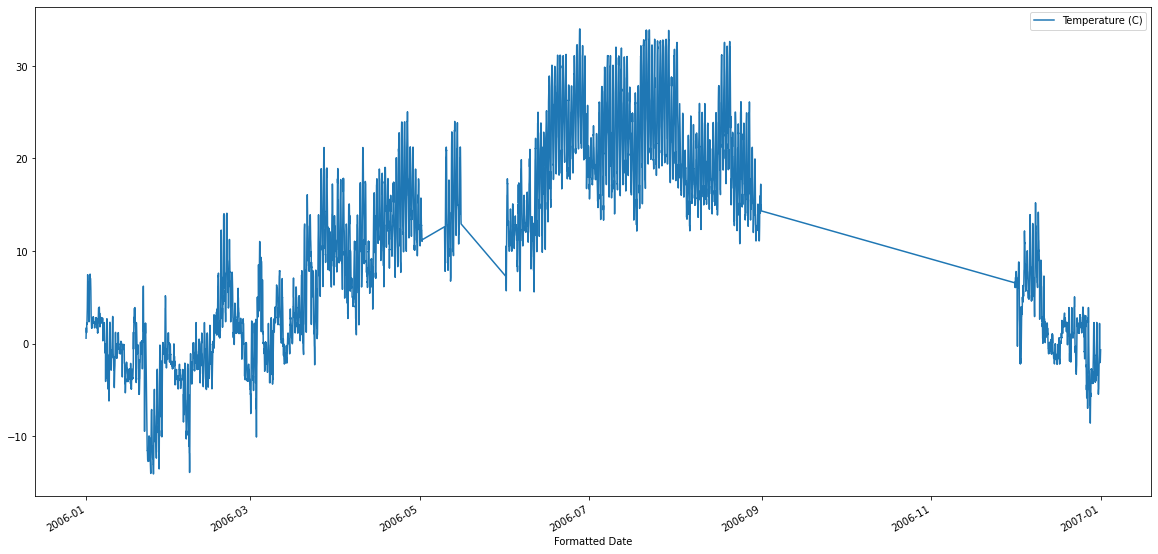

In [16]:
#plotting the data
idata.plot(y="Temperature (C)",figsize=(20,10))

In [17]:
#resampling the data into day format
idata.index = pd.to_datetime(idata.index,utc=True)
idata2 = idata.resample(rule='D').mean()
idata2.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2005-12-31 00:00:00+00:00,0.577778,-4.050000,0.890000,17.114300,1016.660000
2006-01-01 00:00:00+00:00,4.075000,-0.174537,0.817083,21.229192,1011.985000
2006-01-02 00:00:00+00:00,5.263194,1.808796,0.847083,17.824713,1010.384167
2006-01-03 00:00:00+00:00,2.340509,0.445370,0.897083,7.726658,1021.170833
2006-01-04 00:00:00+00:00,2.251852,-0.663194,0.906667,12.152817,981.770833


<AxesSubplot:xlabel='Formatted Date'>

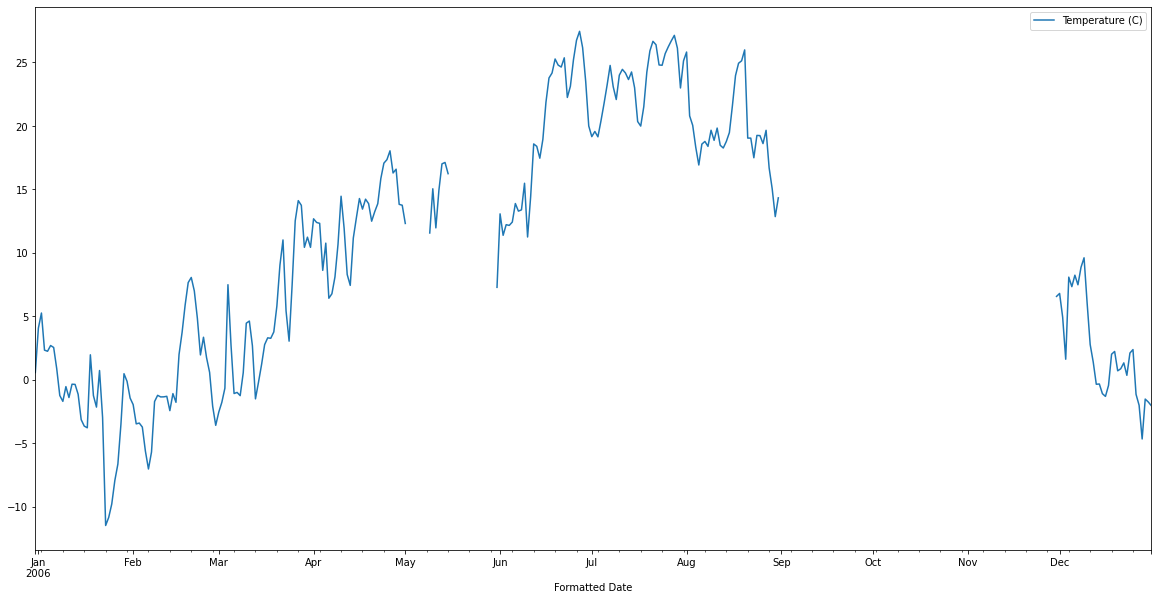

In [18]:
idata2.plot(y="Temperature (C)",figsize=(20,10))

In [19]:
#extracting data from the month of January
jan2006 = idata['2006-01-01':'2006-01-31']
jan2006

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2006-01-01 00:00:00+00:00,1.161111,-3.238889,0.85,16.6152,1016.15
2006-01-01 01:00:00+00:00,1.666667,-3.155556,0.82,20.2538,1015.87
2006-01-01 02:00:00+00:00,1.711111,-2.194444,0.82,14.4900,1015.56
2006-01-01 03:00:00+00:00,1.183333,-2.744444,0.86,13.9426,1014.98
2006-01-01 04:00:00+00:00,1.205556,-3.072222,0.85,15.9068,1014.08
...,...,...,...,...,...
2006-01-31 19:00:00+00:00,-2.400000,-2.400000,0.88,4.6046,1024.54
2006-01-31 20:00:00+00:00,-1.933333,-1.933333,0.85,3.2200,1024.29
2006-01-31 21:00:00+00:00,-1.922222,-3.988889,0.86,5.4901,1024.66


<AxesSubplot:xlabel='Formatted Date'>

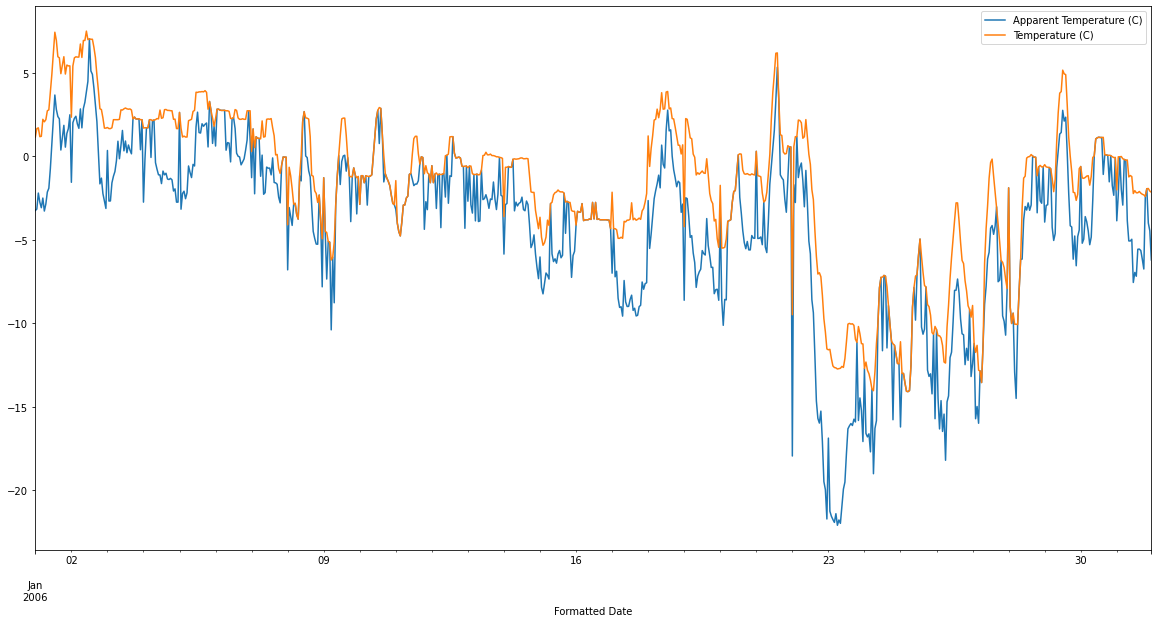

In [20]:
jan2006.plot(y=['Apparent Temperature (C)','Temperature (C)'],kind='line',figsize=(20,10))

In [21]:
#resampling
JAN = jan2006.resample(rule='D').mean()
JAN.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2006-01-01 00:00:00+00:00,4.075000,-0.174537,0.817083,21.229192,1011.985000
2006-01-02 00:00:00+00:00,5.263194,1.808796,0.847083,17.824713,1010.384167
2006-01-03 00:00:00+00:00,2.340509,0.445370,0.897083,7.726658,1021.170833
2006-01-04 00:00:00+00:00,2.251852,-0.663194,0.906667,12.152817,981.770833
2006-01-05 00:00:00+00:00,2.703935,0.445833,0.951250,8.991179,935.873750


<AxesSubplot:xlabel='Formatted Date'>

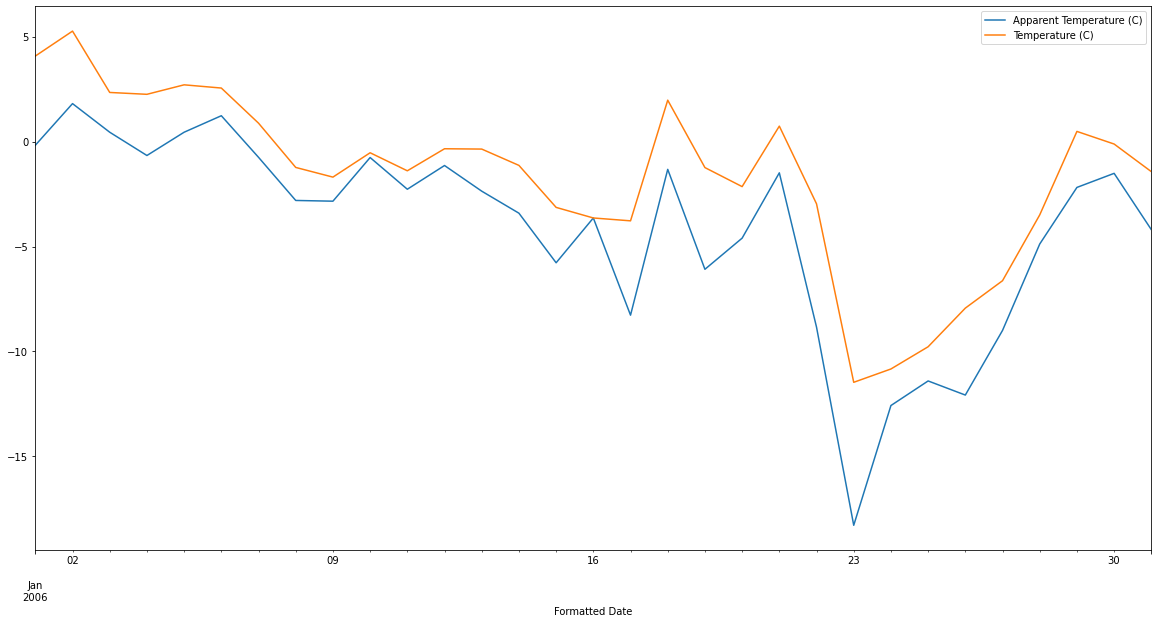

In [22]:
JAN.plot(y=['Apparent Temperature (C)','Temperature (C)'],kind='line',figsize=(20,10))

In [23]:
winter = idata2['2006-01-01':'2006-02-28']
winter2 = idata2['2006-12-01':'2006-12-31']
spring = idata2['2006-03-01':'2006-05-31']
summer = idata2['2006-06-01':'2006-08-31']

<AxesSubplot:xlabel='Formatted Date'>

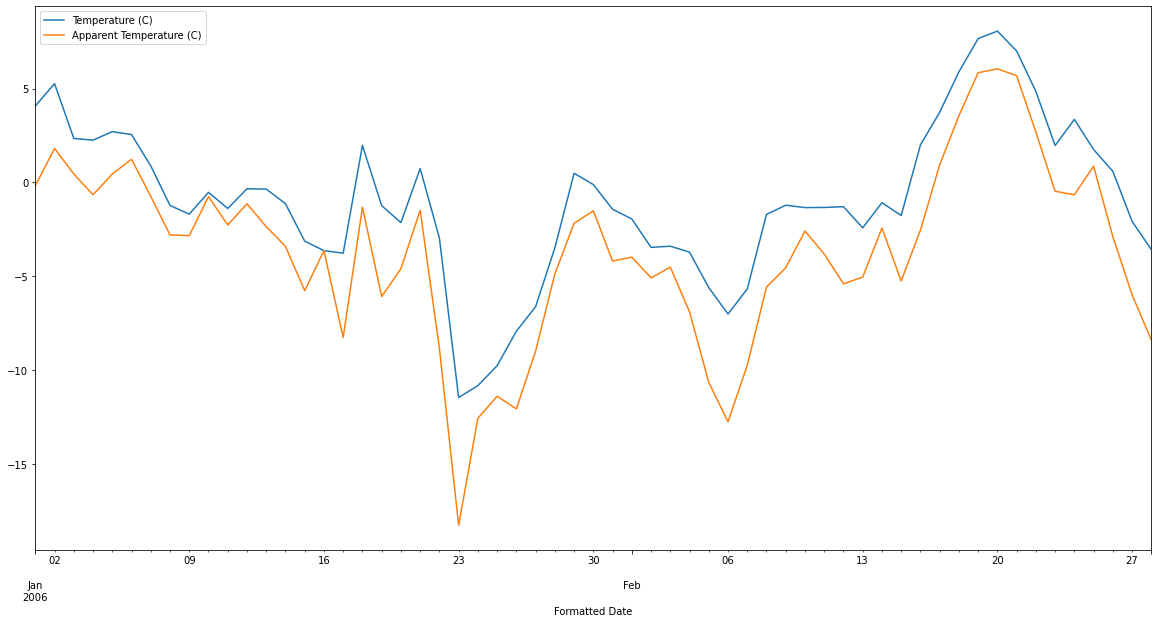

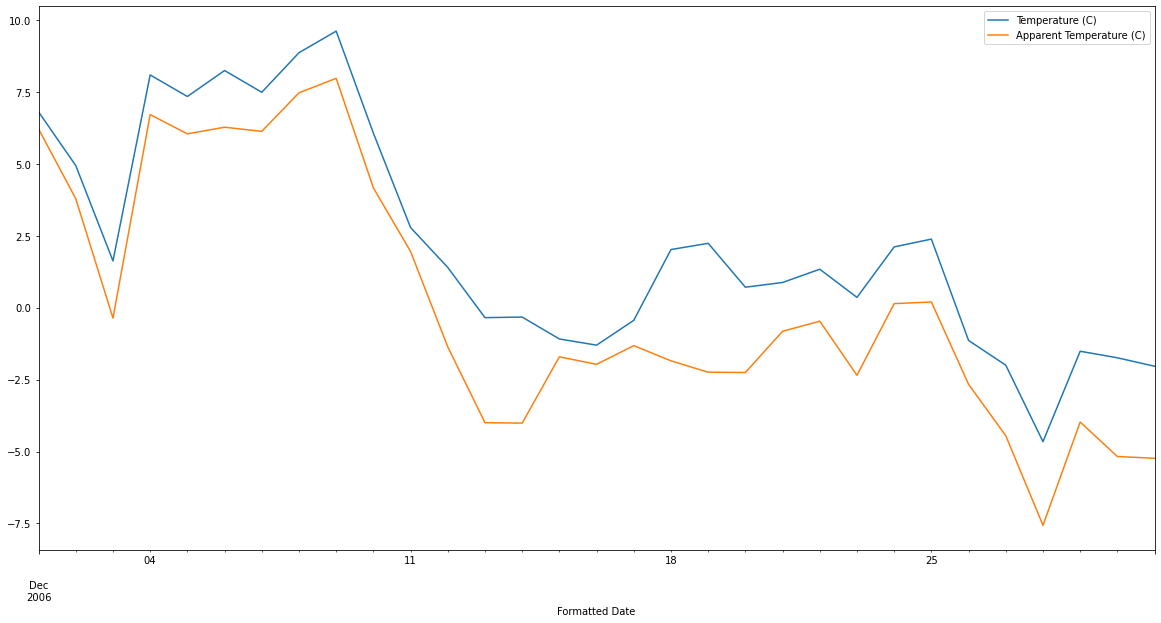

In [24]:
winter.plot(y= ['Temperature (C)','Apparent Temperature (C)'],figsize=(20,10))
winter2.plot(y= ['Temperature (C)','Apparent Temperature (C)'],figsize=(20,10))

<AxesSubplot:xlabel='Formatted Date'>

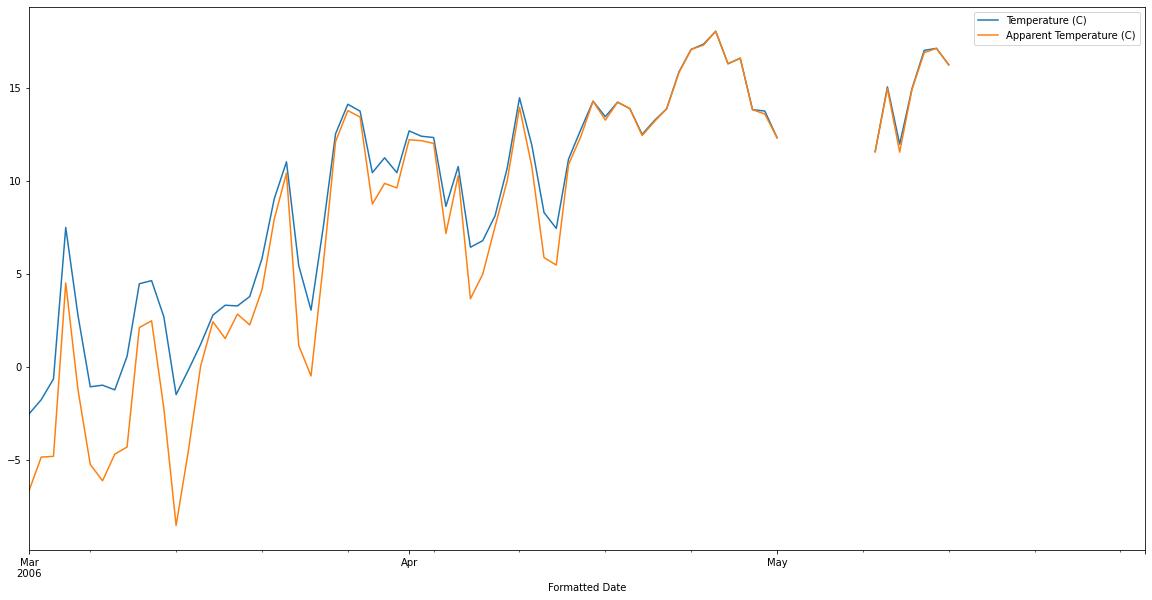

In [25]:
spring.plot(y= ['Temperature (C)','Apparent Temperature (C)'],figsize=(20,10))

<AxesSubplot:xlabel='Formatted Date'>

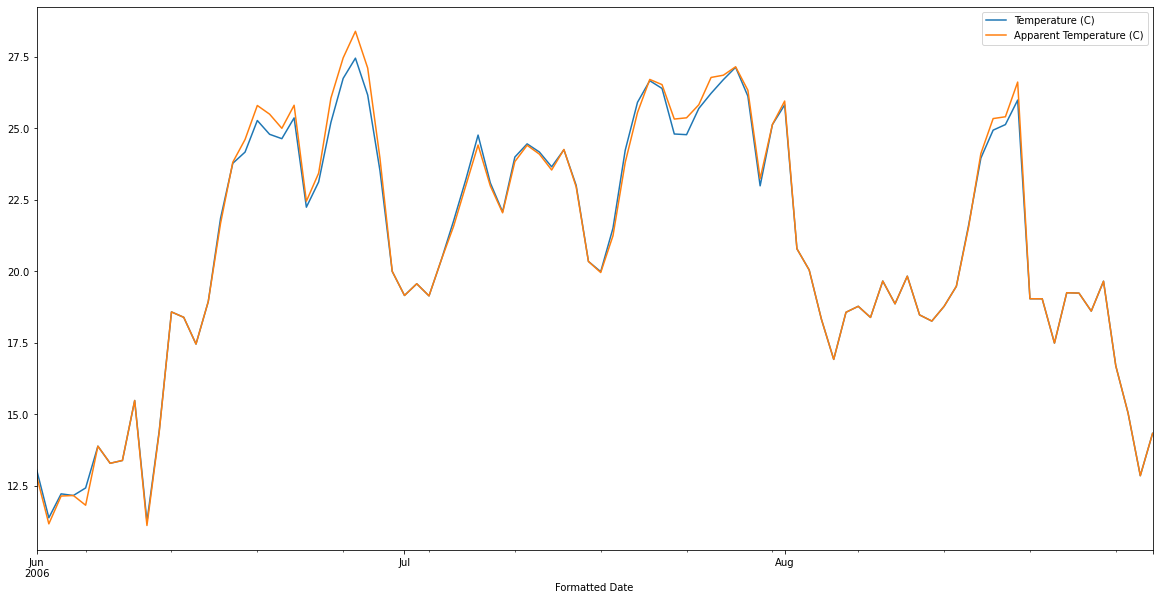

In [26]:
summer.plot(y= ['Temperature (C)','Apparent Temperature (C)'],figsize=(20,10))

## Correlation in data

In [27]:
#checking correlation between the cols
data.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Temperature (C),1.000000,0.992881,-0.564260,-0.053935,-0.080315
Apparent Temperature (C),0.992881,1.000000,-0.535399,-0.126701,-0.077491
Humidity,-0.564260,-0.535399,1.000000,-0.209529,0.061836
Wind Speed (km/h),-0.053935,-0.126701,-0.209529,1.000000,-0.043172
Pressure (millibars),-0.080315,-0.077491,0.061836,-0.043172,1.000000


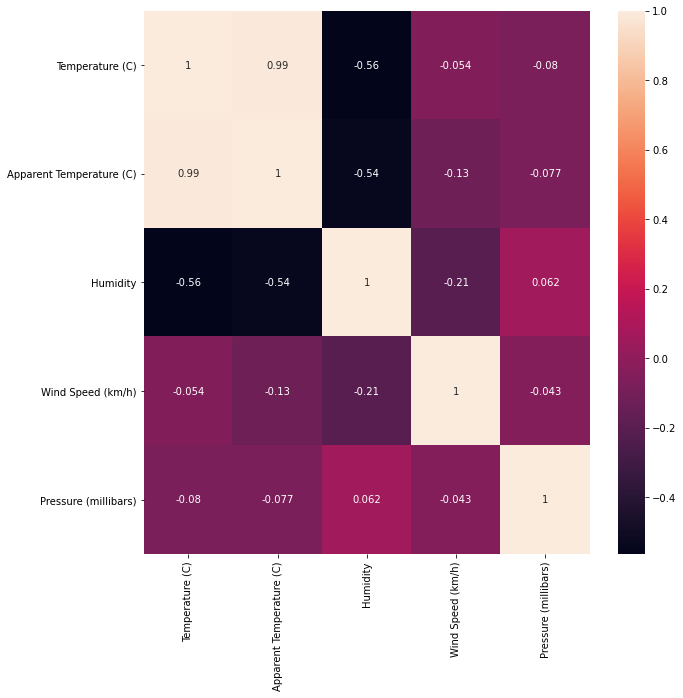

In [28]:
#plotting the correlation
plt.figure(figsize  =(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

## Data Visualization

C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


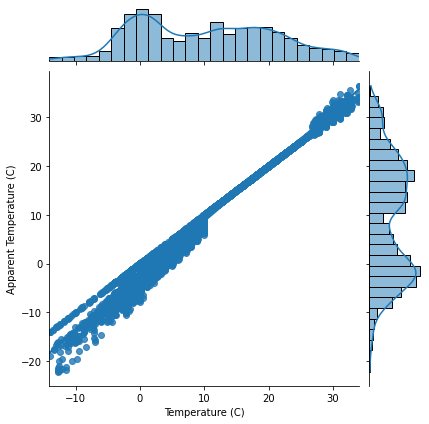

In [29]:
sns.jointplot('Temperature (C)', 'Apparent Temperature (C)',kind="reg", data=data)

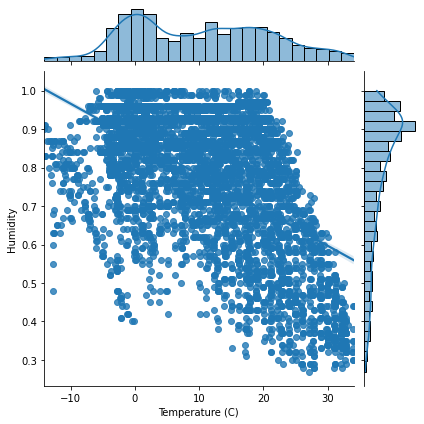

In [30]:
sns.jointplot(kind='reg',y=data['Humidity'],x=data['Temperature (C)'])

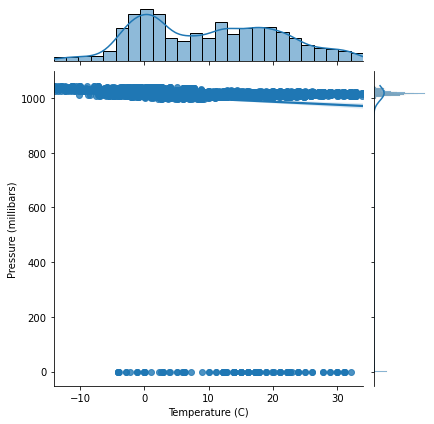

In [31]:
sns.jointplot(kind='reg',y=data['Pressure (millibars)'],x=data['Temperature (C)'])

C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


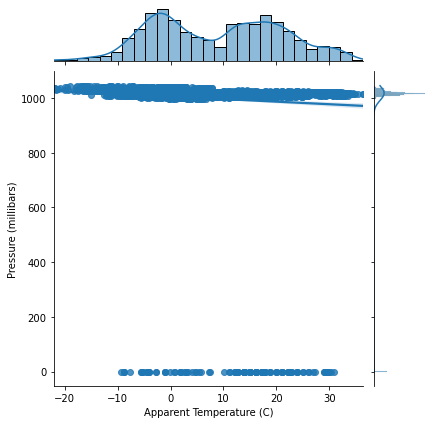

In [32]:
sns.jointplot('Apparent Temperature (C)','Pressure (millibars)',kind="reg", data=data)

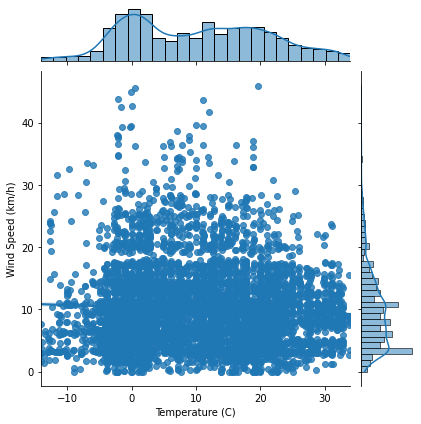

In [33]:
sns.jointplot(kind='reg',y=data['Wind Speed (km/h)'],x=data['Temperature (C)'])

C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


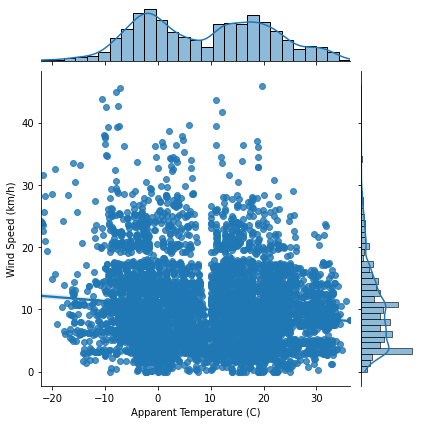

In [34]:
sns.jointplot('Apparent Temperature (C)','Wind Speed (km/h)',kind="reg", data=data)

C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


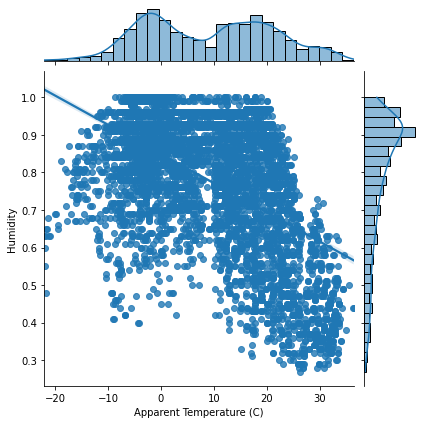

In [35]:
sns.jointplot('Apparent Temperature (C)','Humidity',kind="reg", data=data)

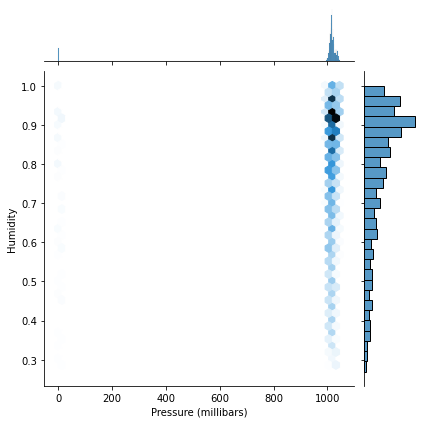

In [36]:
sns.jointplot(kind='hex',y=data['Humidity'],x=data['Pressure (millibars)'])

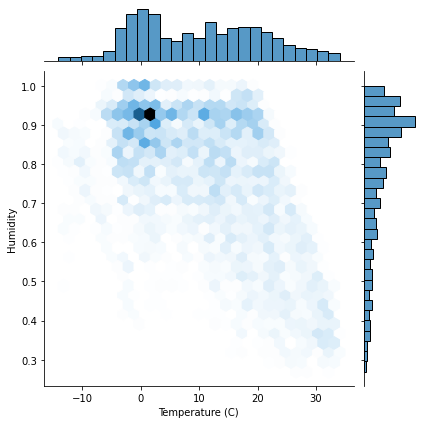

In [37]:
sns.jointplot(kind='hex',y=data['Humidity'],x=data['Temperature (C)'])

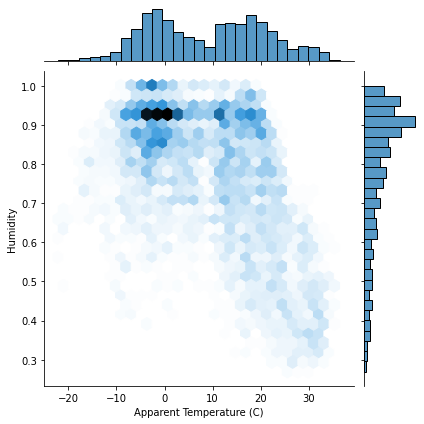

In [38]:
sns.jointplot(kind='hex',y=data['Humidity'],x=data['Apparent Temperature (C)'])

<Figure size 1440x1440 with 0 Axes>

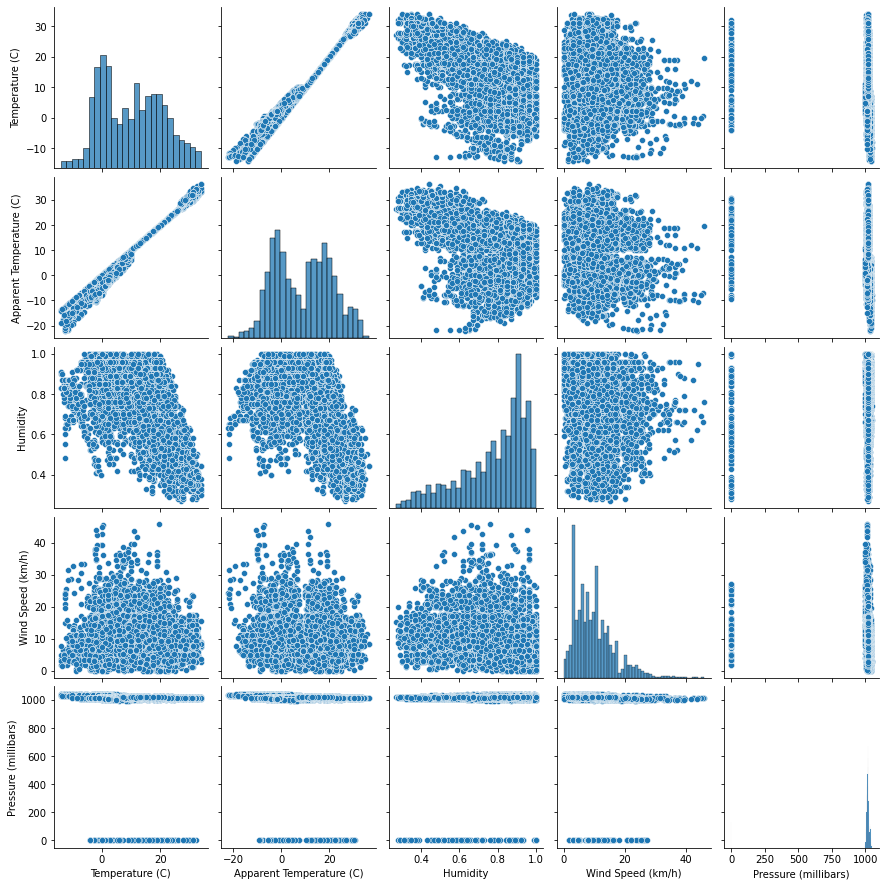

In [39]:
plt.figure(figsize =(20,20))
sns.pairplot(data)
plt.show()

In [40]:
#taking 70% of the data for training
X = idata['2006-01-01':'2006-07-20']
X

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2006-01-01 00:00:00+00:00,1.161111,-3.238889,0.85,16.6152,1016.15
2006-01-01 01:00:00+00:00,1.666667,-3.155556,0.82,20.2538,1015.87
2006-01-01 02:00:00+00:00,1.711111,-2.194444,0.82,14.4900,1015.56
2006-01-01 03:00:00+00:00,1.183333,-2.744444,0.86,13.9426,1014.98
2006-01-01 04:00:00+00:00,1.205556,-3.072222,0.85,15.9068,1014.08
...,...,...,...,...,...
2006-07-20 19:00:00+00:00,25.027778,25.027778,0.62,0.0000,1020.38
2006-07-20 20:00:00+00:00,23.244444,23.244444,0.70,1.1109,1020.61
2006-07-20 21:00:00+00:00,22.255556,22.255556,0.79,2.7370,1020.75


In [41]:
#30% of data for testing
X1 = idata['2006-07-21':'2006-12-31']
X1

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,,
2006-07-21 00:00:00+00:00,21.277778,21.277778,0.85,2.7370,1018.96
2006-07-21 01:00:00+00:00,17.733333,17.733333,0.90,2.9946,1020.64
2006-07-21 02:00:00+00:00,17.711111,17.711111,0.90,6.1502,1020.62
2006-07-21 03:00:00+00:00,17.472222,17.472222,0.89,1.9159,1020.76
2006-07-21 04:00:00+00:00,16.766667,16.766667,0.93,3.2200,1020.82
...,...,...,...,...,...
2006-12-31 18:00:00+00:00,-0.827778,-4.211111,0.92,9.7405,1035.95
2006-12-31 19:00:00+00:00,-2.011111,-5.888889,0.99,10.6904,1035.78
2006-12-31 20:00:00+00:00,-1.500000,-5.327778,0.96,10.8997,1034.92


In [42]:
#taking cols for training the model
X_train = X[['Temperature (C)','Humidity','Wind Speed (km/h)','Pressure (millibars)']]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4248 entries, 2006-01-01 00:00:00+00:00 to 2006-07-20 23:00:00+00:00
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature (C)       4248 non-null   float64
 1   Humidity              4248 non-null   float64
 2   Wind Speed (km/h)     4248 non-null   float64
 3   Pressure (millibars)  4248 non-null   float64
dtypes: float64(4)
memory usage: 165.9 KB


In [44]:
Y_train = X['Apparent Temperature (C)']
Y_train

Formatted Date
2006-01-01 00:00:00+00:00    -3.238889
2006-01-01 01:00:00+00:00    -3.155556
2006-01-01 02:00:00+00:00    -2.194444
2006-01-01 03:00:00+00:00    -2.744444
2006-01-01 04:00:00+00:00    -3.072222
                               ...    
2006-07-20 19:00:00+00:00    25.027778
2006-07-20 20:00:00+00:00    23.244444
2006-07-20 21:00:00+00:00    22.255556
2006-07-20 22:00:00+00:00    19.494444
2006-07-20 23:00:00+00:00    19.422222
Name: Apparent Temperature (C), Length: 4248, dtype: float64

In [45]:
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,Y_train)

LinearRegression()

In [46]:
#taking cols for testing
X_test = X1[['Temperature (C)','Humidity','Wind Speed (km/h)','Pressure (millibars)']]
X_test

,Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
Formatted Date,,,,
2006-07-21 00:00:00+00:00,21.277778,0.85,2.7370,1018.96
2006-07-21 01:00:00+00:00,17.733333,0.90,2.9946,1020.64
2006-07-21 02:00:00+00:00,17.711111,0.90,6.1502,1020.62
2006-07-21 03:00:00+00:00,17.472222,0.89,1.9159,1020.76
2006-07-21 04:00:00+00:00,16.766667,0.93,3.2200,1020.82
...,...,...,...,...
2006-12-31 18:00:00+00:00,-0.827778,0.92,9.7405,1035.95
2006-12-31 19:00:00+00:00,-2.011111,0.99,10.6904,1035.78
2006-12-31 20:00:00+00:00,-1.500000,0.96,10.8997,1034.92


In [47]:
Y_test = X1['Apparent Temperature (C)']
Y_test

Formatted Date
2006-07-21 00:00:00+00:00    21.277778
2006-07-21 01:00:00+00:00    17.733333
2006-07-21 02:00:00+00:00    17.711111
2006-07-21 03:00:00+00:00    17.472222
2006-07-21 04:00:00+00:00    16.766667
                               ...    
2006-12-31 18:00:00+00:00    -4.211111
2006-12-31 19:00:00+00:00    -5.888889
2006-12-31 20:00:00+00:00    -5.327778
2006-12-31 21:00:00+00:00    -4.961111
2006-12-31 22:00:00+00:00    -4.138889
Name: Apparent Temperature (C), Length: 1750, dtype: float64

In [48]:
#predicting the Apparent Temperature
y_pred = regr.predict(X_test)

In [49]:
regr.score(X_test,Y_test)

0.992393474491749

### Showing the Actual Apparent Temperature and the predicted Apparent Temperature 

In [50]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df

,Actual,Predicted
Formatted Date,,
2006-07-21 00:00:00+00:00,21.277778,22.563679
2006-07-21 01:00:00+00:00,17.733333,18.561591
2006-07-21 02:00:00+00:00,17.711111,18.096287
2006-07-21 03:00:00+00:00,17.472222,18.410439
2006-07-21 04:00:00+00:00,16.766667,17.459674
...,...,...
2006-12-31 18:00:00+00:00,-4.211111,-3.313653
2006-12-31 19:00:00+00:00,-5.888889,-4.733725
2006-12-31 20:00:00+00:00,-5.327778,-4.206968


### Calculating the error in prediction 

In [51]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error:  0.8110788905226736
Mean Squared Error:  1.0493637098684723
Root Mean Squared Error:  1.0243845517521593


In [52]:
from xgboost import XGBRegressor

In [53]:
xgb=XGBRegressor(gamma=0.0453032172664104,
 learning_rate= 0.2155158027999262,
 max_depth= 5,
 n_estimators= 102,
 subsample= 0.9439761626945282)

In [54]:
xgb.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.0453032172664104, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2155158027999262,
             max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=102, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.9439761626945282,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [55]:
y_pred = xgb.predict(X_test)

In [56]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error:  0.11692818615526938
Mean Squared Error:  0.03126674526095083
Root Mean Squared Error:  0.1768240517038076


In [57]:
from lightgbm import LGBMRegressor

In [58]:
lgb=LGBMRegressor()

In [59]:
lgb.fit(X_train,Y_train)

LGBMRegressor()

In [60]:
y_pred = lgb.predict(X_test)

In [61]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error:  0.1260367754047708
Mean Squared Error:  0.052548938947025836
Root Mean Squared Error:  0.2292355534096442


In [61]:
!pip install catboost

In [62]:
from catboost import CatBoostRegressor

In [63]:
cb=CatBoostRegressor()

In [64]:
cb.fit(X_train,Y_train)

Learning rate set to 0.051456
0:	learn: 11.1751171	total: 138ms	remaining: 2m 17s
1:	learn: 10.6532868	total: 142ms	remaining: 1m 10s
2:	learn: 10.1614426	total: 145ms	remaining: 48.3s
3:	learn: 9.6998526	total: 149ms	remaining: 37.1s
4:	learn: 9.2399169	total: 153ms	remaining: 30.4s
5:	learn: 8.8143264	total: 156ms	remaining: 25.9s
6:	learn: 8.4039742	total: 166ms	remaining: 23.5s
7:	learn: 8.0247460	total: 170ms	remaining: 21s
8:	learn: 7.6646499	total: 173ms	remaining: 19.1s
9:	learn: 7.3076063	total: 177ms	remaining: 17.6s
10:	learn: 6.9671238	total: 181ms	remaining: 16.3s
11:	learn: 6.6545470	total: 185ms	remaining: 15.2s
12:	learn: 6.3478999	total: 189ms	remaining: 14.3s
13:	learn: 6.0619990	total: 192ms	remaining: 13.5s
14:	learn: 5.7808392	total: 196ms	remaining: 12.9s
15:	learn: 5.5226060	total: 200ms	remaining: 12.3s
16:	learn: 5.2907461	total: 204ms	remaining: 11.8s
17:	learn: 5.0545672	total: 208ms	remaining: 11.3s
18:	learn: 4.8339385	total: 212ms	remaining: 10.9s
19:	lear

165:	learn: 0.3460842	total: 1.07s	remaining: 5.38s
166:	learn: 0.3450075	total: 1.07s	remaining: 5.36s
167:	learn: 0.3441998	total: 1.08s	remaining: 5.34s
168:	learn: 0.3429852	total: 1.08s	remaining: 5.32s
169:	learn: 0.3420416	total: 1.08s	remaining: 5.3s
170:	learn: 0.3410413	total: 1.09s	remaining: 5.28s
171:	learn: 0.3397115	total: 1.12s	remaining: 5.38s
172:	learn: 0.3385193	total: 1.12s	remaining: 5.36s
173:	learn: 0.3373133	total: 1.12s	remaining: 5.34s
174:	learn: 0.3362882	total: 1.13s	remaining: 5.32s
175:	learn: 0.3351974	total: 1.13s	remaining: 5.3s
176:	learn: 0.3339811	total: 1.14s	remaining: 5.28s
177:	learn: 0.3328288	total: 1.14s	remaining: 5.26s
178:	learn: 0.3312385	total: 1.14s	remaining: 5.24s
179:	learn: 0.3301835	total: 1.15s	remaining: 5.22s
180:	learn: 0.3292638	total: 1.15s	remaining: 5.2s
181:	learn: 0.3282044	total: 1.15s	remaining: 5.18s
182:	learn: 0.3267435	total: 1.18s	remaining: 5.26s
183:	learn: 0.3255423	total: 1.18s	remaining: 5.24s
184:	learn: 0.3

329:	learn: 0.2330622	total: 1.97s	remaining: 3.99s
330:	learn: 0.2326506	total: 1.97s	remaining: 3.98s
331:	learn: 0.2325071	total: 1.97s	remaining: 3.97s
332:	learn: 0.2321560	total: 1.98s	remaining: 3.96s
333:	learn: 0.2317841	total: 1.99s	remaining: 3.97s
334:	learn: 0.2315023	total: 2s	remaining: 3.98s
335:	learn: 0.2311866	total: 2.01s	remaining: 3.97s
336:	learn: 0.2308387	total: 2.01s	remaining: 3.96s
337:	learn: 0.2305531	total: 2.02s	remaining: 3.95s
338:	learn: 0.2302344	total: 2.02s	remaining: 3.94s
339:	learn: 0.2298070	total: 2.02s	remaining: 3.92s
340:	learn: 0.2293082	total: 2.03s	remaining: 3.92s
341:	learn: 0.2289498	total: 2.03s	remaining: 3.9s
342:	learn: 0.2283817	total: 2.03s	remaining: 3.89s
343:	learn: 0.2281413	total: 2.07s	remaining: 3.94s
344:	learn: 0.2277366	total: 2.07s	remaining: 3.93s
345:	learn: 0.2273296	total: 2.07s	remaining: 3.92s
346:	learn: 0.2268457	total: 2.08s	remaining: 3.91s
347:	learn: 0.2264962	total: 2.08s	remaining: 3.9s
348:	learn: 0.226

497:	learn: 0.1841032	total: 2.88s	remaining: 2.9s
498:	learn: 0.1838518	total: 2.88s	remaining: 2.9s
499:	learn: 0.1835442	total: 2.89s	remaining: 2.89s
500:	learn: 0.1833398	total: 2.89s	remaining: 2.88s
501:	learn: 0.1830369	total: 2.9s	remaining: 2.87s
502:	learn: 0.1828044	total: 2.9s	remaining: 2.87s
503:	learn: 0.1826476	total: 2.9s	remaining: 2.86s
504:	learn: 0.1825486	total: 2.91s	remaining: 2.85s
505:	learn: 0.1823777	total: 2.91s	remaining: 2.84s
506:	learn: 0.1821144	total: 2.91s	remaining: 2.83s
507:	learn: 0.1819686	total: 2.92s	remaining: 2.83s
508:	learn: 0.1818766	total: 2.93s	remaining: 2.82s
509:	learn: 0.1817087	total: 2.93s	remaining: 2.82s
510:	learn: 0.1814472	total: 2.94s	remaining: 2.81s
511:	learn: 0.1812532	total: 2.94s	remaining: 2.8s
512:	learn: 0.1811138	total: 2.94s	remaining: 2.79s
513:	learn: 0.1808221	total: 2.95s	remaining: 2.79s
514:	learn: 0.1806347	total: 2.95s	remaining: 2.78s
515:	learn: 0.1804922	total: 2.95s	remaining: 2.77s
516:	learn: 0.1802

669:	learn: 0.1575536	total: 3.73s	remaining: 1.84s
670:	learn: 0.1573708	total: 3.74s	remaining: 1.83s
671:	learn: 0.1573058	total: 3.75s	remaining: 1.83s
672:	learn: 0.1572047	total: 3.76s	remaining: 1.83s
673:	learn: 0.1570353	total: 3.76s	remaining: 1.82s
674:	learn: 0.1568979	total: 3.77s	remaining: 1.81s
675:	learn: 0.1567704	total: 3.77s	remaining: 1.81s
676:	learn: 0.1566963	total: 3.78s	remaining: 1.8s
677:	learn: 0.1565396	total: 3.81s	remaining: 1.81s
678:	learn: 0.1564487	total: 3.82s	remaining: 1.8s
679:	learn: 0.1563463	total: 3.83s	remaining: 1.8s
680:	learn: 0.1562389	total: 3.83s	remaining: 1.8s
681:	learn: 0.1561916	total: 3.84s	remaining: 1.79s
682:	learn: 0.1560357	total: 3.84s	remaining: 1.78s
683:	learn: 0.1559516	total: 3.85s	remaining: 1.78s
684:	learn: 0.1558788	total: 3.85s	remaining: 1.77s
685:	learn: 0.1557348	total: 3.85s	remaining: 1.76s
686:	learn: 0.1556279	total: 3.86s	remaining: 1.76s
687:	learn: 0.1555344	total: 3.86s	remaining: 1.75s
688:	learn: 0.15

836:	learn: 0.1412054	total: 4.65s	remaining: 905ms
837:	learn: 0.1411674	total: 4.65s	remaining: 900ms
838:	learn: 0.1410677	total: 4.66s	remaining: 894ms
839:	learn: 0.1409647	total: 4.66s	remaining: 888ms
840:	learn: 0.1408788	total: 4.66s	remaining: 882ms
841:	learn: 0.1407637	total: 4.67s	remaining: 876ms
842:	learn: 0.1406546	total: 4.67s	remaining: 870ms
843:	learn: 0.1405280	total: 4.69s	remaining: 866ms
844:	learn: 0.1404566	total: 4.69s	remaining: 860ms
845:	learn: 0.1403436	total: 4.69s	remaining: 854ms
846:	learn: 0.1402357	total: 4.71s	remaining: 851ms
847:	learn: 0.1401579	total: 4.71s	remaining: 845ms
848:	learn: 0.1400951	total: 4.71s	remaining: 839ms
849:	learn: 0.1400021	total: 4.72s	remaining: 833ms
850:	learn: 0.1399037	total: 4.73s	remaining: 828ms
851:	learn: 0.1398345	total: 4.73s	remaining: 822ms
852:	learn: 0.1397711	total: 4.77s	remaining: 821ms
853:	learn: 0.1397213	total: 4.77s	remaining: 816ms
854:	learn: 0.1396749	total: 4.77s	remaining: 810ms
855:	learn: 

997:	learn: 0.1286719	total: 5.53s	remaining: 11.1ms
998:	learn: 0.1286053	total: 5.53s	remaining: 5.54ms
999:	learn: 0.1285440	total: 5.53s	remaining: 0us


In [65]:
y_pred = cb.predict(X_test)

In [66]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error:  0.1441303595482599
Mean Squared Error:  0.054540656897065234
Root Mean Squared Error:  0.2335394118710271


In [67]:
from sklearn.ensemble import StackingRegressor

In [68]:
estimators = [('regr', regr), ('xgb', XGBRegressor(gamma=0.0453032172664104,
 learning_rate= 0.2155158027999262,
 max_depth= 5,
 n_estimators= 102,
 subsample= 0.9439761626945282)), ('lgb', LGBMRegressor(gamma=0.18727005942368125,
 learning_rate=0.3152142919229748,
 max_depth= 4,
 n_estimators= 107,
 subsample= 0.8394633936788146)),('cb', cb)]

clf = StackingRegressor(estimators=estimators)

In [69]:
clf.fit(X_train,Y_train)

[LightGBM] [Warning] Unknown parameter: gamma
Learning rate set to 0.051456
0:	learn: 11.1751171	total: 3.88ms	remaining: 3.88s
1:	learn: 10.6532868	total: 8.52ms	remaining: 4.25s
2:	learn: 10.1614426	total: 12.5ms	remaining: 4.14s
3:	learn: 9.6998526	total: 16.1ms	remaining: 4.02s
4:	learn: 9.2399169	total: 19.3ms	remaining: 3.83s
5:	learn: 8.8143264	total: 23ms	remaining: 3.81s
6:	learn: 8.4039742	total: 26.5ms	remaining: 3.75s
7:	learn: 8.0247460	total: 30.1ms	remaining: 3.73s
8:	learn: 7.6646499	total: 33.8ms	remaining: 3.72s
9:	learn: 7.3076063	total: 37.3ms	remaining: 3.69s
10:	learn: 6.9671238	total: 40.8ms	remaining: 3.67s
11:	learn: 6.6545470	total: 44.4ms	remaining: 3.65s
12:	learn: 6.3478999	total: 48ms	remaining: 3.64s
13:	learn: 6.0619990	total: 53.4ms	remaining: 3.76s
14:	learn: 5.7808392	total: 60.3ms	remaining: 3.96s
15:	learn: 5.5226060	total: 63.9ms	remaining: 3.93s
16:	learn: 5.2907461	total: 67.6ms	remaining: 3.91s
17:	learn: 5.0545672	total: 71.4ms	remaining: 3.89s

165:	learn: 0.3460842	total: 894ms	remaining: 4.49s
166:	learn: 0.3450075	total: 898ms	remaining: 4.48s
167:	learn: 0.3441998	total: 901ms	remaining: 4.46s
168:	learn: 0.3429852	total: 904ms	remaining: 4.45s
169:	learn: 0.3420416	total: 908ms	remaining: 4.43s
170:	learn: 0.3410413	total: 925ms	remaining: 4.48s
171:	learn: 0.3397115	total: 929ms	remaining: 4.47s
172:	learn: 0.3385193	total: 932ms	remaining: 4.46s
173:	learn: 0.3373133	total: 935ms	remaining: 4.44s
174:	learn: 0.3362882	total: 939ms	remaining: 4.43s
175:	learn: 0.3351974	total: 943ms	remaining: 4.41s
176:	learn: 0.3339811	total: 947ms	remaining: 4.4s
177:	learn: 0.3328288	total: 951ms	remaining: 4.39s
178:	learn: 0.3312385	total: 954ms	remaining: 4.38s
179:	learn: 0.3301835	total: 973ms	remaining: 4.43s
180:	learn: 0.3292638	total: 977ms	remaining: 4.42s
181:	learn: 0.3282044	total: 980ms	remaining: 4.41s
182:	learn: 0.3267435	total: 984ms	remaining: 4.39s
183:	learn: 0.3255423	total: 987ms	remaining: 4.38s
184:	learn: 0

357:	learn: 0.2223749	total: 2s	remaining: 3.58s
358:	learn: 0.2220098	total: 2s	remaining: 3.57s
359:	learn: 0.2216108	total: 2s	remaining: 3.56s
360:	learn: 0.2213498	total: 2.01s	remaining: 3.55s
361:	learn: 0.2210482	total: 2.01s	remaining: 3.54s
362:	learn: 0.2205258	total: 2.01s	remaining: 3.53s
363:	learn: 0.2200001	total: 2.02s	remaining: 3.53s
364:	learn: 0.2196501	total: 2.02s	remaining: 3.52s
365:	learn: 0.2193382	total: 2.04s	remaining: 3.53s
366:	learn: 0.2192054	total: 2.04s	remaining: 3.52s
367:	learn: 0.2188580	total: 2.04s	remaining: 3.51s
368:	learn: 0.2184409	total: 2.05s	remaining: 3.5s
369:	learn: 0.2180097	total: 2.05s	remaining: 3.5s
370:	learn: 0.2177054	total: 2.06s	remaining: 3.49s
371:	learn: 0.2173493	total: 2.06s	remaining: 3.48s
372:	learn: 0.2169529	total: 2.06s	remaining: 3.47s
373:	learn: 0.2168263	total: 2.07s	remaining: 3.46s
374:	learn: 0.2163333	total: 2.07s	remaining: 3.45s
375:	learn: 0.2160363	total: 2.07s	remaining: 3.44s
376:	learn: 0.2157951	t

525:	learn: 0.1784940	total: 2.89s	remaining: 2.6s
526:	learn: 0.1783614	total: 2.89s	remaining: 2.6s
527:	learn: 0.1782129	total: 2.9s	remaining: 2.59s
528:	learn: 0.1780510	total: 2.9s	remaining: 2.58s
529:	learn: 0.1778431	total: 2.9s	remaining: 2.57s
530:	learn: 0.1776759	total: 2.92s	remaining: 2.58s
531:	learn: 0.1775249	total: 2.94s	remaining: 2.58s
532:	learn: 0.1773629	total: 2.94s	remaining: 2.58s
533:	learn: 0.1771129	total: 2.95s	remaining: 2.57s
534:	learn: 0.1768131	total: 2.96s	remaining: 2.57s
535:	learn: 0.1765912	total: 2.96s	remaining: 2.57s
536:	learn: 0.1764343	total: 2.97s	remaining: 2.56s
537:	learn: 0.1762190	total: 2.97s	remaining: 2.55s
538:	learn: 0.1759230	total: 2.98s	remaining: 2.54s
539:	learn: 0.1757743	total: 2.98s	remaining: 2.54s
540:	learn: 0.1756716	total: 2.98s	remaining: 2.53s
541:	learn: 0.1755355	total: 2.99s	remaining: 2.52s
542:	learn: 0.1753980	total: 3s	remaining: 2.53s
543:	learn: 0.1752360	total: 3.01s	remaining: 2.52s
544:	learn: 0.175109

698:	learn: 0.1542261	total: 3.77s	remaining: 1.63s
699:	learn: 0.1540785	total: 3.78s	remaining: 1.62s
700:	learn: 0.1539895	total: 3.81s	remaining: 1.62s
701:	learn: 0.1539150	total: 3.81s	remaining: 1.62s
702:	learn: 0.1538223	total: 3.81s	remaining: 1.61s
703:	learn: 0.1537059	total: 3.82s	remaining: 1.6s
704:	learn: 0.1535577	total: 3.82s	remaining: 1.6s
705:	learn: 0.1534902	total: 3.83s	remaining: 1.59s
706:	learn: 0.1533689	total: 3.83s	remaining: 1.59s
707:	learn: 0.1532780	total: 3.83s	remaining: 1.58s
708:	learn: 0.1531976	total: 3.84s	remaining: 1.57s
709:	learn: 0.1530819	total: 3.84s	remaining: 1.57s
710:	learn: 0.1529690	total: 3.84s	remaining: 1.56s
711:	learn: 0.1529108	total: 3.85s	remaining: 1.56s
712:	learn: 0.1528270	total: 3.88s	remaining: 1.56s
713:	learn: 0.1527291	total: 3.89s	remaining: 1.56s
714:	learn: 0.1526078	total: 3.89s	remaining: 1.55s
715:	learn: 0.1524843	total: 3.89s	remaining: 1.54s
716:	learn: 0.1523818	total: 3.9s	remaining: 1.54s
717:	learn: 0.1

878:	learn: 0.1375355	total: 4.85s	remaining: 668ms
879:	learn: 0.1374934	total: 4.85s	remaining: 662ms
880:	learn: 0.1374281	total: 4.86s	remaining: 656ms
881:	learn: 0.1373239	total: 4.86s	remaining: 651ms
882:	learn: 0.1372420	total: 4.87s	remaining: 645ms
883:	learn: 0.1371380	total: 4.87s	remaining: 639ms
884:	learn: 0.1370987	total: 4.87s	remaining: 633ms
885:	learn: 0.1370159	total: 4.9s	remaining: 631ms
886:	learn: 0.1369335	total: 4.9s	remaining: 625ms
887:	learn: 0.1368870	total: 4.91s	remaining: 619ms
888:	learn: 0.1368258	total: 4.91s	remaining: 613ms
889:	learn: 0.1367629	total: 4.91s	remaining: 607ms
890:	learn: 0.1366862	total: 4.92s	remaining: 602ms
891:	learn: 0.1366185	total: 4.92s	remaining: 596ms
892:	learn: 0.1365315	total: 4.92s	remaining: 590ms
893:	learn: 0.1364989	total: 4.93s	remaining: 584ms
894:	learn: 0.1364374	total: 4.96s	remaining: 582ms
895:	learn: 0.1362886	total: 4.97s	remaining: 577ms
896:	learn: 0.1361977	total: 4.97s	remaining: 571ms
897:	learn: 0.

37:	learn: 2.1139937	total: 158ms	remaining: 4s
38:	learn: 2.0343203	total: 162ms	remaining: 3.99s
39:	learn: 1.9574129	total: 165ms	remaining: 3.97s
40:	learn: 1.8825874	total: 169ms	remaining: 3.95s
41:	learn: 1.8113940	total: 200ms	remaining: 4.55s
42:	learn: 1.7450271	total: 203ms	remaining: 4.51s
43:	learn: 1.6804252	total: 206ms	remaining: 4.48s
44:	learn: 1.6176180	total: 210ms	remaining: 4.46s
45:	learn: 1.5588865	total: 213ms	remaining: 4.42s
46:	learn: 1.5069878	total: 217ms	remaining: 4.39s
47:	learn: 1.4518966	total: 221ms	remaining: 4.38s
48:	learn: 1.4019669	total: 224ms	remaining: 4.35s
49:	learn: 1.3604796	total: 227ms	remaining: 4.32s
50:	learn: 1.3143187	total: 231ms	remaining: 4.3s
51:	learn: 1.2737435	total: 234ms	remaining: 4.27s
52:	learn: 1.2340265	total: 238ms	remaining: 4.25s
53:	learn: 1.1957356	total: 241ms	remaining: 4.23s
54:	learn: 1.1575306	total: 245ms	remaining: 4.21s
55:	learn: 1.1212269	total: 249ms	remaining: 4.19s
56:	learn: 1.0898560	total: 252ms	r

205:	learn: 0.3273621	total: 1.02s	remaining: 3.95s
206:	learn: 0.3267479	total: 1.03s	remaining: 3.94s
207:	learn: 0.3262465	total: 1.03s	remaining: 3.93s
208:	learn: 0.3251228	total: 1.03s	remaining: 3.92s
209:	learn: 0.3234796	total: 1.04s	remaining: 3.91s
210:	learn: 0.3230297	total: 1.04s	remaining: 3.9s
211:	learn: 0.3224043	total: 1.05s	remaining: 3.89s
212:	learn: 0.3215958	total: 1.07s	remaining: 3.96s
213:	learn: 0.3206883	total: 1.07s	remaining: 3.94s
214:	learn: 0.3193902	total: 1.07s	remaining: 3.93s
215:	learn: 0.3187998	total: 1.08s	remaining: 3.91s
216:	learn: 0.3177765	total: 1.08s	remaining: 3.9s
217:	learn: 0.3167651	total: 1.08s	remaining: 3.89s
218:	learn: 0.3159543	total: 1.09s	remaining: 3.88s
219:	learn: 0.3152081	total: 1.09s	remaining: 3.87s
220:	learn: 0.3142993	total: 1.09s	remaining: 3.85s
221:	learn: 0.3138839	total: 1.1s	remaining: 3.84s
222:	learn: 0.3129327	total: 1.11s	remaining: 3.87s
223:	learn: 0.3119331	total: 1.13s	remaining: 3.91s
224:	learn: 0.3

388:	learn: 0.2260339	total: 1.92s	remaining: 3.01s
389:	learn: 0.2258850	total: 1.92s	remaining: 3.01s
390:	learn: 0.2255019	total: 1.93s	remaining: 3s
391:	learn: 0.2250508	total: 1.93s	remaining: 2.99s
392:	learn: 0.2248373	total: 1.93s	remaining: 2.98s
393:	learn: 0.2246166	total: 1.95s	remaining: 2.99s
394:	learn: 0.2243977	total: 1.95s	remaining: 2.99s
395:	learn: 0.2238493	total: 1.95s	remaining: 2.98s
396:	learn: 0.2235371	total: 1.96s	remaining: 2.97s
397:	learn: 0.2231203	total: 1.96s	remaining: 2.96s
398:	learn: 0.2228298	total: 1.96s	remaining: 2.96s
399:	learn: 0.2225716	total: 1.97s	remaining: 2.96s
400:	learn: 0.2222456	total: 1.97s	remaining: 2.95s
401:	learn: 0.2220722	total: 1.98s	remaining: 2.94s
402:	learn: 0.2218735	total: 1.98s	remaining: 2.94s
403:	learn: 0.2216851	total: 1.98s	remaining: 2.93s
404:	learn: 0.2213041	total: 1.99s	remaining: 2.92s
405:	learn: 0.2210690	total: 1.99s	remaining: 2.91s
406:	learn: 0.2207622	total: 2s	remaining: 2.91s
407:	learn: 0.2203

578:	learn: 0.1815202	total: 2.99s	remaining: 2.17s
579:	learn: 0.1812993	total: 2.99s	remaining: 2.17s
580:	learn: 0.1811494	total: 2.99s	remaining: 2.16s
581:	learn: 0.1808263	total: 3s	remaining: 2.15s
582:	learn: 0.1805477	total: 3s	remaining: 2.15s
583:	learn: 0.1802882	total: 3s	remaining: 2.14s
584:	learn: 0.1800942	total: 3.01s	remaining: 2.13s
585:	learn: 0.1800174	total: 3.01s	remaining: 2.13s
586:	learn: 0.1799311	total: 3.03s	remaining: 2.13s
587:	learn: 0.1796139	total: 3.03s	remaining: 2.12s
588:	learn: 0.1795583	total: 3.04s	remaining: 2.12s
589:	learn: 0.1794416	total: 3.04s	remaining: 2.11s
590:	learn: 0.1791962	total: 3.04s	remaining: 2.11s
591:	learn: 0.1790203	total: 3.05s	remaining: 2.1s
592:	learn: 0.1788813	total: 3.05s	remaining: 2.09s
593:	learn: 0.1787810	total: 3.05s	remaining: 2.09s
594:	learn: 0.1785931	total: 3.06s	remaining: 2.08s
595:	learn: 0.1783202	total: 3.06s	remaining: 2.08s
596:	learn: 0.1781630	total: 3.07s	remaining: 2.07s
597:	learn: 0.1778328	

751:	learn: 0.1546185	total: 3.84s	remaining: 1.26s
752:	learn: 0.1545022	total: 3.84s	remaining: 1.26s
753:	learn: 0.1543859	total: 3.85s	remaining: 1.25s
754:	learn: 0.1543000	total: 3.87s	remaining: 1.25s
755:	learn: 0.1542307	total: 3.87s	remaining: 1.25s
756:	learn: 0.1540741	total: 3.88s	remaining: 1.25s
757:	learn: 0.1538410	total: 3.89s	remaining: 1.24s
758:	learn: 0.1536617	total: 3.89s	remaining: 1.24s
759:	learn: 0.1535302	total: 3.92s	remaining: 1.24s
760:	learn: 0.1534128	total: 3.92s	remaining: 1.23s
761:	learn: 0.1532159	total: 3.93s	remaining: 1.23s
762:	learn: 0.1530751	total: 3.93s	remaining: 1.22s
763:	learn: 0.1529274	total: 3.93s	remaining: 1.21s
764:	learn: 0.1528662	total: 3.94s	remaining: 1.21s
765:	learn: 0.1526774	total: 3.94s	remaining: 1.2s
766:	learn: 0.1525015	total: 3.94s	remaining: 1.2s
767:	learn: 0.1523155	total: 3.95s	remaining: 1.19s
768:	learn: 0.1522553	total: 3.97s	remaining: 1.19s
769:	learn: 0.1521390	total: 3.97s	remaining: 1.19s
770:	learn: 0.

920:	learn: 0.1365322	total: 4.71s	remaining: 404ms
921:	learn: 0.1364828	total: 4.71s	remaining: 399ms
922:	learn: 0.1364066	total: 4.72s	remaining: 394ms
923:	learn: 0.1363361	total: 4.72s	remaining: 388ms
924:	learn: 0.1362158	total: 4.73s	remaining: 384ms
925:	learn: 0.1361484	total: 4.74s	remaining: 379ms
926:	learn: 0.1360529	total: 4.74s	remaining: 373ms
927:	learn: 0.1358908	total: 4.74s	remaining: 368ms
928:	learn: 0.1357520	total: 4.75s	remaining: 363ms
929:	learn: 0.1356204	total: 4.75s	remaining: 358ms
930:	learn: 0.1355859	total: 4.75s	remaining: 352ms
931:	learn: 0.1354677	total: 4.76s	remaining: 347ms
932:	learn: 0.1354251	total: 4.76s	remaining: 342ms
933:	learn: 0.1353711	total: 4.77s	remaining: 337ms
934:	learn: 0.1352491	total: 4.78s	remaining: 332ms
935:	learn: 0.1351550	total: 4.78s	remaining: 327ms
936:	learn: 0.1351090	total: 4.78s	remaining: 322ms
937:	learn: 0.1349997	total: 4.79s	remaining: 316ms
938:	learn: 0.1349131	total: 4.82s	remaining: 313ms
939:	learn: 

101:	learn: 0.4961488	total: 497ms	remaining: 4.38s
102:	learn: 0.4923289	total: 510ms	remaining: 4.45s
103:	learn: 0.4891117	total: 514ms	remaining: 4.42s
104:	learn: 0.4853026	total: 518ms	remaining: 4.42s
105:	learn: 0.4821240	total: 522ms	remaining: 4.4s
106:	learn: 0.4790716	total: 525ms	remaining: 4.38s
107:	learn: 0.4754666	total: 528ms	remaining: 4.36s
108:	learn: 0.4727438	total: 533ms	remaining: 4.36s
109:	learn: 0.4699856	total: 536ms	remaining: 4.34s
110:	learn: 0.4669992	total: 540ms	remaining: 4.32s
111:	learn: 0.4640100	total: 565ms	remaining: 4.48s
112:	learn: 0.4613920	total: 569ms	remaining: 4.47s
113:	learn: 0.4586173	total: 572ms	remaining: 4.45s
114:	learn: 0.4563958	total: 576ms	remaining: 4.43s
115:	learn: 0.4532773	total: 580ms	remaining: 4.42s
116:	learn: 0.4504582	total: 584ms	remaining: 4.41s
117:	learn: 0.4466561	total: 588ms	remaining: 4.39s
118:	learn: 0.4444918	total: 591ms	remaining: 4.38s
119:	learn: 0.4418770	total: 618ms	remaining: 4.53s
120:	learn: 0

288:	learn: 0.2551561	total: 1.57s	remaining: 3.87s
289:	learn: 0.2546450	total: 1.58s	remaining: 3.86s
290:	learn: 0.2541778	total: 1.58s	remaining: 3.85s
291:	learn: 0.2536594	total: 1.58s	remaining: 3.84s
292:	learn: 0.2531481	total: 1.59s	remaining: 3.83s
293:	learn: 0.2525878	total: 1.59s	remaining: 3.82s
294:	learn: 0.2519923	total: 1.59s	remaining: 3.81s
295:	learn: 0.2514086	total: 1.61s	remaining: 3.82s
296:	learn: 0.2508556	total: 1.61s	remaining: 3.81s
297:	learn: 0.2503515	total: 1.61s	remaining: 3.8s
298:	learn: 0.2498788	total: 1.62s	remaining: 3.79s
299:	learn: 0.2493806	total: 1.62s	remaining: 3.78s
300:	learn: 0.2489931	total: 1.62s	remaining: 3.77s
301:	learn: 0.2486108	total: 1.63s	remaining: 3.76s
302:	learn: 0.2480209	total: 1.63s	remaining: 3.75s
303:	learn: 0.2475988	total: 1.63s	remaining: 3.74s
304:	learn: 0.2472950	total: 1.64s	remaining: 3.73s
305:	learn: 0.2467946	total: 1.64s	remaining: 3.72s
306:	learn: 0.2464713	total: 1.64s	remaining: 3.71s
307:	learn: 0

456:	learn: 0.2000674	total: 2.43s	remaining: 2.89s
457:	learn: 0.1999056	total: 2.43s	remaining: 2.88s
458:	learn: 0.1997188	total: 2.44s	remaining: 2.87s
459:	learn: 0.1995788	total: 2.44s	remaining: 2.87s
460:	learn: 0.1992884	total: 2.44s	remaining: 2.86s
461:	learn: 0.1990997	total: 2.45s	remaining: 2.85s
462:	learn: 0.1989733	total: 2.45s	remaining: 2.84s
463:	learn: 0.1987338	total: 2.46s	remaining: 2.84s
464:	learn: 0.1985655	total: 2.48s	remaining: 2.85s
465:	learn: 0.1984360	total: 2.49s	remaining: 2.85s
466:	learn: 0.1983162	total: 2.5s	remaining: 2.85s
467:	learn: 0.1982108	total: 2.51s	remaining: 2.86s
468:	learn: 0.1980580	total: 2.52s	remaining: 2.86s
469:	learn: 0.1978964	total: 2.53s	remaining: 2.85s
470:	learn: 0.1975940	total: 2.53s	remaining: 2.84s
471:	learn: 0.1974440	total: 2.54s	remaining: 2.84s
472:	learn: 0.1972848	total: 2.54s	remaining: 2.83s
473:	learn: 0.1970372	total: 2.54s	remaining: 2.82s
474:	learn: 0.1969081	total: 2.54s	remaining: 2.81s
475:	learn: 0

637:	learn: 0.1691857	total: 3.32s	remaining: 1.88s
638:	learn: 0.1690523	total: 3.32s	remaining: 1.88s
639:	learn: 0.1689330	total: 3.32s	remaining: 1.87s
640:	learn: 0.1688572	total: 3.33s	remaining: 1.86s
641:	learn: 0.1687540	total: 3.33s	remaining: 1.86s
642:	learn: 0.1686169	total: 3.35s	remaining: 1.86s
643:	learn: 0.1684984	total: 3.36s	remaining: 1.85s
644:	learn: 0.1684095	total: 3.36s	remaining: 1.85s
645:	learn: 0.1682284	total: 3.37s	remaining: 1.84s
646:	learn: 0.1681378	total: 3.37s	remaining: 1.84s
647:	learn: 0.1680126	total: 3.37s	remaining: 1.83s
648:	learn: 0.1679477	total: 3.38s	remaining: 1.82s
649:	learn: 0.1677417	total: 3.38s	remaining: 1.82s
650:	learn: 0.1675928	total: 3.38s	remaining: 1.81s
651:	learn: 0.1674506	total: 3.4s	remaining: 1.81s
652:	learn: 0.1673784	total: 3.4s	remaining: 1.81s
653:	learn: 0.1673134	total: 3.41s	remaining: 1.8s
654:	learn: 0.1671586	total: 3.41s	remaining: 1.8s
655:	learn: 0.1670769	total: 3.42s	remaining: 1.79s
656:	learn: 0.16

803:	learn: 0.1511720	total: 4.2s	remaining: 1.02s
804:	learn: 0.1510728	total: 4.21s	remaining: 1.02s
805:	learn: 0.1509073	total: 4.21s	remaining: 1.01s
806:	learn: 0.1508647	total: 4.21s	remaining: 1.01s
807:	learn: 0.1508056	total: 4.22s	remaining: 1s
808:	learn: 0.1506827	total: 4.22s	remaining: 997ms
809:	learn: 0.1505187	total: 4.23s	remaining: 991ms
810:	learn: 0.1504472	total: 4.23s	remaining: 986ms
811:	learn: 0.1503558	total: 4.25s	remaining: 983ms
812:	learn: 0.1502474	total: 4.25s	remaining: 977ms
813:	learn: 0.1501564	total: 4.27s	remaining: 975ms
814:	learn: 0.1500567	total: 4.27s	remaining: 969ms
815:	learn: 0.1499584	total: 4.27s	remaining: 964ms
816:	learn: 0.1499072	total: 4.28s	remaining: 958ms
817:	learn: 0.1498341	total: 4.28s	remaining: 952ms
818:	learn: 0.1497652	total: 4.28s	remaining: 947ms
819:	learn: 0.1496666	total: 4.29s	remaining: 941ms
820:	learn: 0.1495928	total: 4.29s	remaining: 935ms
821:	learn: 0.1495464	total: 4.29s	remaining: 930ms
822:	learn: 0.14

969:	learn: 0.1366813	total: 5.12s	remaining: 158ms
970:	learn: 0.1366102	total: 5.14s	remaining: 154ms
971:	learn: 0.1365377	total: 5.15s	remaining: 148ms
972:	learn: 0.1365048	total: 5.15s	remaining: 143ms
973:	learn: 0.1363668	total: 5.16s	remaining: 138ms
974:	learn: 0.1363231	total: 5.16s	remaining: 132ms
975:	learn: 0.1362299	total: 5.16s	remaining: 127ms
976:	learn: 0.1361840	total: 5.17s	remaining: 122ms
977:	learn: 0.1361479	total: 5.17s	remaining: 116ms
978:	learn: 0.1361047	total: 5.17s	remaining: 111ms
979:	learn: 0.1360233	total: 5.21s	remaining: 106ms
980:	learn: 0.1359552	total: 5.21s	remaining: 101ms
981:	learn: 0.1358938	total: 5.22s	remaining: 95.6ms
982:	learn: 0.1358275	total: 5.22s	remaining: 90.3ms
983:	learn: 0.1357891	total: 5.22s	remaining: 85ms
984:	learn: 0.1357024	total: 5.23s	remaining: 79.6ms
985:	learn: 0.1356470	total: 5.23s	remaining: 74.3ms
986:	learn: 0.1355259	total: 5.24s	remaining: 69ms
987:	learn: 0.1354159	total: 5.24s	remaining: 63.6ms
988:	lear

147:	learn: 0.4265441	total: 760ms	remaining: 4.37s
148:	learn: 0.4246918	total: 788ms	remaining: 4.5s
149:	learn: 0.4235503	total: 791ms	remaining: 4.48s
150:	learn: 0.4208597	total: 794ms	remaining: 4.46s
151:	learn: 0.4198814	total: 798ms	remaining: 4.45s
152:	learn: 0.4186400	total: 801ms	remaining: 4.43s
153:	learn: 0.4168823	total: 805ms	remaining: 4.42s
154:	learn: 0.4156083	total: 808ms	remaining: 4.41s
155:	learn: 0.4144773	total: 812ms	remaining: 4.39s
156:	learn: 0.4133245	total: 818ms	remaining: 4.39s
157:	learn: 0.4115522	total: 822ms	remaining: 4.38s
158:	learn: 0.4097400	total: 825ms	remaining: 4.37s
159:	learn: 0.4087196	total: 828ms	remaining: 4.35s
160:	learn: 0.4065564	total: 832ms	remaining: 4.33s
161:	learn: 0.4055817	total: 835ms	remaining: 4.32s
162:	learn: 0.4044122	total: 839ms	remaining: 4.31s
163:	learn: 0.4037196	total: 842ms	remaining: 4.29s
164:	learn: 0.4029474	total: 846ms	remaining: 4.28s
165:	learn: 0.4014343	total: 850ms	remaining: 4.27s
166:	learn: 0

328:	learn: 0.2686212	total: 1.63s	remaining: 3.32s
329:	learn: 0.2681773	total: 1.63s	remaining: 3.31s
330:	learn: 0.2676637	total: 1.64s	remaining: 3.31s
331:	learn: 0.2671390	total: 1.64s	remaining: 3.3s
332:	learn: 0.2666484	total: 1.64s	remaining: 3.29s
333:	learn: 0.2661887	total: 1.65s	remaining: 3.28s
334:	learn: 0.2655754	total: 1.65s	remaining: 3.27s
335:	learn: 0.2651113	total: 1.65s	remaining: 3.27s
336:	learn: 0.2646710	total: 1.66s	remaining: 3.26s
337:	learn: 0.2643518	total: 1.66s	remaining: 3.25s
338:	learn: 0.2640920	total: 1.66s	remaining: 3.24s
339:	learn: 0.2636456	total: 1.67s	remaining: 3.23s
340:	learn: 0.2632999	total: 1.67s	remaining: 3.23s
341:	learn: 0.2627744	total: 1.67s	remaining: 3.22s
342:	learn: 0.2622555	total: 1.68s	remaining: 3.21s
343:	learn: 0.2619650	total: 1.69s	remaining: 3.22s
344:	learn: 0.2616428	total: 1.69s	remaining: 3.21s
345:	learn: 0.2612404	total: 1.7s	remaining: 3.21s
346:	learn: 0.2610759	total: 1.7s	remaining: 3.2s
347:	learn: 0.26

491:	learn: 0.2161309	total: 2.52s	remaining: 2.6s
492:	learn: 0.2159814	total: 2.52s	remaining: 2.59s
493:	learn: 0.2156174	total: 2.56s	remaining: 2.63s
494:	learn: 0.2154833	total: 2.57s	remaining: 2.62s
495:	learn: 0.2153284	total: 2.57s	remaining: 2.61s
496:	learn: 0.2150540	total: 2.58s	remaining: 2.61s
497:	learn: 0.2148260	total: 2.58s	remaining: 2.6s
498:	learn: 0.2145753	total: 2.58s	remaining: 2.59s
499:	learn: 0.2142442	total: 2.59s	remaining: 2.59s
500:	learn: 0.2139248	total: 2.59s	remaining: 2.58s
501:	learn: 0.2137265	total: 2.59s	remaining: 2.57s
502:	learn: 0.2134341	total: 2.6s	remaining: 2.57s
503:	learn: 0.2132235	total: 2.6s	remaining: 2.56s
504:	learn: 0.2130009	total: 2.6s	remaining: 2.55s
505:	learn: 0.2128543	total: 2.61s	remaining: 2.54s
506:	learn: 0.2127177	total: 2.61s	remaining: 2.54s
507:	learn: 0.2124944	total: 2.61s	remaining: 2.53s
508:	learn: 0.2121726	total: 2.62s	remaining: 2.52s
509:	learn: 0.2120013	total: 2.62s	remaining: 2.52s
510:	learn: 0.211

650:	learn: 0.1841721	total: 3.52s	remaining: 1.89s
651:	learn: 0.1840815	total: 3.53s	remaining: 1.88s
652:	learn: 0.1839265	total: 3.53s	remaining: 1.88s
653:	learn: 0.1836197	total: 3.53s	remaining: 1.87s
654:	learn: 0.1834324	total: 3.54s	remaining: 1.86s
655:	learn: 0.1833347	total: 3.54s	remaining: 1.86s
656:	learn: 0.1830788	total: 3.54s	remaining: 1.85s
657:	learn: 0.1829221	total: 3.55s	remaining: 1.84s
658:	learn: 0.1828135	total: 3.55s	remaining: 1.84s
659:	learn: 0.1825783	total: 3.58s	remaining: 1.85s
660:	learn: 0.1822813	total: 3.59s	remaining: 1.84s
661:	learn: 0.1821995	total: 3.59s	remaining: 1.83s
662:	learn: 0.1820197	total: 3.59s	remaining: 1.83s
663:	learn: 0.1818202	total: 3.6s	remaining: 1.82s
664:	learn: 0.1815903	total: 3.6s	remaining: 1.81s
665:	learn: 0.1814565	total: 3.6s	remaining: 1.81s
666:	learn: 0.1813194	total: 3.61s	remaining: 1.8s
667:	learn: 0.1812094	total: 3.65s	remaining: 1.81s
668:	learn: 0.1810264	total: 3.65s	remaining: 1.81s
669:	learn: 0.18

834:	learn: 0.1584813	total: 4.78s	remaining: 944ms
835:	learn: 0.1583576	total: 4.78s	remaining: 938ms
836:	learn: 0.1582212	total: 4.78s	remaining: 932ms
837:	learn: 0.1580975	total: 4.79s	remaining: 926ms
838:	learn: 0.1579991	total: 4.79s	remaining: 919ms
839:	learn: 0.1579083	total: 4.79s	remaining: 913ms
840:	learn: 0.1578031	total: 4.8s	remaining: 907ms
841:	learn: 0.1576479	total: 4.82s	remaining: 905ms
842:	learn: 0.1575292	total: 4.83s	remaining: 899ms
843:	learn: 0.1573256	total: 4.83s	remaining: 893ms
844:	learn: 0.1572140	total: 4.83s	remaining: 887ms
845:	learn: 0.1570754	total: 4.84s	remaining: 881ms
846:	learn: 0.1570007	total: 4.84s	remaining: 875ms
847:	learn: 0.1569172	total: 4.84s	remaining: 869ms
848:	learn: 0.1567788	total: 4.85s	remaining: 863ms
849:	learn: 0.1566638	total: 4.85s	remaining: 857ms
850:	learn: 0.1565287	total: 4.88s	remaining: 855ms
851:	learn: 0.1564465	total: 4.9s	remaining: 851ms
852:	learn: 0.1562545	total: 4.9s	remaining: 845ms
853:	learn: 0.1

Learning rate set to 0.049674
0:	learn: 11.7679817	total: 4.02ms	remaining: 4.01s
1:	learn: 11.2323428	total: 7.65ms	remaining: 3.81s
2:	learn: 10.7437447	total: 11ms	remaining: 3.66s
3:	learn: 10.2563368	total: 14.8ms	remaining: 3.69s
4:	learn: 9.7895169	total: 18.7ms	remaining: 3.72s
5:	learn: 9.3539204	total: 22.5ms	remaining: 3.73s
6:	learn: 8.9349238	total: 26.1ms	remaining: 3.7s
7:	learn: 8.5328884	total: 34.1ms	remaining: 4.22s
8:	learn: 8.1578345	total: 37.6ms	remaining: 4.14s
9:	learn: 7.7914794	total: 41ms	remaining: 4.06s
10:	learn: 7.4478753	total: 44.5ms	remaining: 4s
11:	learn: 7.1234599	total: 48.6ms	remaining: 4s
12:	learn: 6.8092278	total: 52ms	remaining: 3.95s
13:	learn: 6.5063766	total: 55.6ms	remaining: 3.92s
14:	learn: 6.2131197	total: 59.6ms	remaining: 3.91s
15:	learn: 5.9491955	total: 69.2ms	remaining: 4.25s
16:	learn: 5.7019310	total: 73ms	remaining: 4.22s
17:	learn: 5.4639753	total: 76.7ms	remaining: 4.19s
18:	learn: 5.2272089	total: 81.8ms	remaining: 4.22s
19:

176:	learn: 0.3470310	total: 1.05s	remaining: 4.88s
177:	learn: 0.3458080	total: 1.05s	remaining: 4.86s
178:	learn: 0.3446944	total: 1.06s	remaining: 4.84s
179:	learn: 0.3430214	total: 1.06s	remaining: 4.83s
180:	learn: 0.3420993	total: 1.07s	remaining: 4.84s
181:	learn: 0.3410546	total: 1.07s	remaining: 4.82s
182:	learn: 0.3395202	total: 1.08s	remaining: 4.8s
183:	learn: 0.3380808	total: 1.08s	remaining: 4.79s
184:	learn: 0.3366379	total: 1.08s	remaining: 4.77s
185:	learn: 0.3357410	total: 1.09s	remaining: 4.75s
186:	learn: 0.3349355	total: 1.09s	remaining: 4.74s
187:	learn: 0.3335789	total: 1.09s	remaining: 4.72s
188:	learn: 0.3326461	total: 1.1s	remaining: 4.71s
189:	learn: 0.3319314	total: 1.13s	remaining: 4.83s
190:	learn: 0.3308022	total: 1.14s	remaining: 4.82s
191:	learn: 0.3299221	total: 1.14s	remaining: 4.8s
192:	learn: 0.3289075	total: 1.14s	remaining: 4.79s
193:	learn: 0.3282618	total: 1.15s	remaining: 4.77s
194:	learn: 0.3275139	total: 1.15s	remaining: 4.75s
195:	learn: 0.3

335:	learn: 0.2427641	total: 2.18s	remaining: 4.32s
336:	learn: 0.2424387	total: 2.19s	remaining: 4.3s
337:	learn: 0.2419522	total: 2.19s	remaining: 4.29s
338:	learn: 0.2415732	total: 2.19s	remaining: 4.28s
339:	learn: 0.2412623	total: 2.2s	remaining: 4.27s
340:	learn: 0.2406702	total: 2.2s	remaining: 4.25s
341:	learn: 0.2401131	total: 2.2s	remaining: 4.24s
342:	learn: 0.2399985	total: 2.21s	remaining: 4.23s
343:	learn: 0.2395236	total: 2.21s	remaining: 4.22s
344:	learn: 0.2391474	total: 2.27s	remaining: 4.31s
345:	learn: 0.2387986	total: 2.27s	remaining: 4.3s
346:	learn: 0.2382284	total: 2.28s	remaining: 4.29s
347:	learn: 0.2379675	total: 2.28s	remaining: 4.27s
348:	learn: 0.2375422	total: 2.28s	remaining: 4.26s
349:	learn: 0.2372501	total: 2.29s	remaining: 4.25s
350:	learn: 0.2369010	total: 2.29s	remaining: 4.24s
351:	learn: 0.2364847	total: 2.29s	remaining: 4.22s
352:	learn: 0.2361567	total: 2.3s	remaining: 4.21s
353:	learn: 0.2358243	total: 2.35s	remaining: 4.28s
354:	learn: 0.2355

520:	learn: 0.1911920	total: 3.4s	remaining: 3.12s
521:	learn: 0.1910583	total: 3.4s	remaining: 3.11s
522:	learn: 0.1909343	total: 3.4s	remaining: 3.1s
523:	learn: 0.1908150	total: 3.41s	remaining: 3.1s
524:	learn: 0.1906067	total: 3.41s	remaining: 3.09s
525:	learn: 0.1903988	total: 3.42s	remaining: 3.08s
526:	learn: 0.1902409	total: 3.43s	remaining: 3.08s
527:	learn: 0.1900839	total: 3.44s	remaining: 3.08s
528:	learn: 0.1899470	total: 3.48s	remaining: 3.1s
529:	learn: 0.1897688	total: 3.48s	remaining: 3.09s
530:	learn: 0.1896255	total: 3.49s	remaining: 3.08s
531:	learn: 0.1894143	total: 3.49s	remaining: 3.07s
532:	learn: 0.1892385	total: 3.5s	remaining: 3.06s
533:	learn: 0.1889312	total: 3.5s	remaining: 3.05s
534:	learn: 0.1888102	total: 3.5s	remaining: 3.04s
535:	learn: 0.1886743	total: 3.5s	remaining: 3.03s
536:	learn: 0.1885210	total: 3.51s	remaining: 3.02s
537:	learn: 0.1883769	total: 3.52s	remaining: 3.02s
538:	learn: 0.1881912	total: 3.52s	remaining: 3.01s
539:	learn: 0.1880890	

687:	learn: 0.1660173	total: 4.29s	remaining: 1.95s
688:	learn: 0.1658574	total: 4.29s	remaining: 1.94s
689:	learn: 0.1657822	total: 4.3s	remaining: 1.93s
690:	learn: 0.1655964	total: 4.3s	remaining: 1.92s
691:	learn: 0.1655408	total: 4.3s	remaining: 1.92s
692:	learn: 0.1653503	total: 4.31s	remaining: 1.91s
693:	learn: 0.1652129	total: 4.33s	remaining: 1.91s
694:	learn: 0.1651206	total: 4.33s	remaining: 1.9s
695:	learn: 0.1649837	total: 4.33s	remaining: 1.89s
696:	learn: 0.1649120	total: 4.34s	remaining: 1.89s
697:	learn: 0.1645625	total: 4.34s	remaining: 1.88s
698:	learn: 0.1643957	total: 4.34s	remaining: 1.87s
699:	learn: 0.1642446	total: 4.35s	remaining: 1.86s
700:	learn: 0.1640056	total: 4.35s	remaining: 1.86s
701:	learn: 0.1639014	total: 4.37s	remaining: 1.85s
702:	learn: 0.1638138	total: 4.37s	remaining: 1.85s
703:	learn: 0.1636752	total: 4.38s	remaining: 1.84s
704:	learn: 0.1635229	total: 4.38s	remaining: 1.83s
705:	learn: 0.1634286	total: 4.38s	remaining: 1.82s
706:	learn: 0.16

861:	learn: 0.1466522	total: 5.21s	remaining: 833ms
862:	learn: 0.1465655	total: 5.22s	remaining: 828ms
863:	learn: 0.1464909	total: 5.22s	remaining: 822ms
864:	learn: 0.1464372	total: 5.22s	remaining: 815ms
865:	learn: 0.1463368	total: 5.23s	remaining: 809ms
866:	learn: 0.1462358	total: 5.23s	remaining: 802ms
867:	learn: 0.1461368	total: 5.23s	remaining: 796ms
868:	learn: 0.1460691	total: 5.24s	remaining: 789ms
869:	learn: 0.1459899	total: 5.24s	remaining: 783ms
870:	learn: 0.1459035	total: 5.24s	remaining: 777ms
871:	learn: 0.1458479	total: 5.25s	remaining: 771ms
872:	learn: 0.1457171	total: 5.25s	remaining: 764ms
873:	learn: 0.1456700	total: 5.26s	remaining: 758ms
874:	learn: 0.1455959	total: 5.26s	remaining: 752ms
875:	learn: 0.1455430	total: 5.26s	remaining: 745ms
876:	learn: 0.1454088	total: 5.27s	remaining: 739ms
877:	learn: 0.1453514	total: 5.27s	remaining: 733ms
878:	learn: 0.1452775	total: 5.28s	remaining: 726ms
879:	learn: 0.1450597	total: 5.28s	remaining: 720ms
880:	learn: 

34:	learn: 2.1158079	total: 189ms	remaining: 5.2s
35:	learn: 2.0303305	total: 192ms	remaining: 5.15s
36:	learn: 1.9540939	total: 196ms	remaining: 5.1s
37:	learn: 1.8779203	total: 199ms	remaining: 5.05s
38:	learn: 1.8103048	total: 203ms	remaining: 5s
39:	learn: 1.7439283	total: 206ms	remaining: 4.95s
40:	learn: 1.6747015	total: 210ms	remaining: 4.9s
41:	learn: 1.6132578	total: 213ms	remaining: 4.86s
42:	learn: 1.5524258	total: 216ms	remaining: 4.81s
43:	learn: 1.4960790	total: 228ms	remaining: 4.95s
44:	learn: 1.4419586	total: 231ms	remaining: 4.9s
45:	learn: 1.3902187	total: 236ms	remaining: 4.89s
46:	learn: 1.3380309	total: 240ms	remaining: 4.86s
47:	learn: 1.2896961	total: 243ms	remaining: 4.81s
48:	learn: 1.2454060	total: 246ms	remaining: 4.77s
49:	learn: 1.2076250	total: 249ms	remaining: 4.74s
50:	learn: 1.1688449	total: 253ms	remaining: 4.7s
51:	learn: 1.1274837	total: 256ms	remaining: 4.67s
52:	learn: 1.0936253	total: 286ms	remaining: 5.11s
53:	learn: 1.0599067	total: 289ms	remai

205:	learn: 0.2534866	total: 1.01s	remaining: 3.9s
206:	learn: 0.2528575	total: 1.02s	remaining: 3.9s
207:	learn: 0.2520756	total: 1.04s	remaining: 3.95s
208:	learn: 0.2514766	total: 1.08s	remaining: 4.09s
209:	learn: 0.2509647	total: 1.09s	remaining: 4.09s
210:	learn: 0.2503131	total: 1.13s	remaining: 4.21s
211:	learn: 0.2496736	total: 1.13s	remaining: 4.2s
212:	learn: 0.2492588	total: 1.14s	remaining: 4.2s
213:	learn: 0.2483593	total: 1.14s	remaining: 4.18s
214:	learn: 0.2475438	total: 1.14s	remaining: 4.17s
215:	learn: 0.2470176	total: 1.15s	remaining: 4.16s
216:	learn: 0.2464664	total: 1.15s	remaining: 4.17s
217:	learn: 0.2458004	total: 1.16s	remaining: 4.15s
218:	learn: 0.2450497	total: 1.19s	remaining: 4.25s
219:	learn: 0.2445371	total: 1.2s	remaining: 4.24s
220:	learn: 0.2440051	total: 1.2s	remaining: 4.23s
221:	learn: 0.2434530	total: 1.2s	remaining: 4.22s
222:	learn: 0.2428279	total: 1.21s	remaining: 4.23s
223:	learn: 0.2422997	total: 1.22s	remaining: 4.23s
224:	learn: 0.24168

376:	learn: 0.1856537	total: 2.05s	remaining: 3.39s
377:	learn: 0.1853205	total: 2.06s	remaining: 3.38s
378:	learn: 0.1850658	total: 2.06s	remaining: 3.38s
379:	learn: 0.1847005	total: 2.06s	remaining: 3.37s
380:	learn: 0.1844345	total: 2.1s	remaining: 3.4s
381:	learn: 0.1842373	total: 2.1s	remaining: 3.4s
382:	learn: 0.1839866	total: 2.1s	remaining: 3.39s
383:	learn: 0.1837412	total: 2.1s	remaining: 3.38s
384:	learn: 0.1834573	total: 2.11s	remaining: 3.37s
385:	learn: 0.1833019	total: 2.11s	remaining: 3.36s
386:	learn: 0.1831919	total: 2.12s	remaining: 3.35s
387:	learn: 0.1827613	total: 2.12s	remaining: 3.34s
388:	learn: 0.1825806	total: 2.12s	remaining: 3.33s
389:	learn: 0.1822662	total: 2.13s	remaining: 3.33s
390:	learn: 0.1820513	total: 2.13s	remaining: 3.33s
391:	learn: 0.1818183	total: 2.14s	remaining: 3.32s
392:	learn: 0.1815947	total: 2.14s	remaining: 3.31s
393:	learn: 0.1813186	total: 2.15s	remaining: 3.3s
394:	learn: 0.1811262	total: 2.15s	remaining: 3.29s
395:	learn: 0.18083

542:	learn: 0.1561275	total: 2.94s	remaining: 2.47s
543:	learn: 0.1560123	total: 2.94s	remaining: 2.46s
544:	learn: 0.1559238	total: 2.94s	remaining: 2.46s
545:	learn: 0.1557690	total: 2.95s	remaining: 2.45s
546:	learn: 0.1555186	total: 2.95s	remaining: 2.44s
547:	learn: 0.1554124	total: 2.95s	remaining: 2.44s
548:	learn: 0.1553437	total: 2.96s	remaining: 2.43s
549:	learn: 0.1552966	total: 2.96s	remaining: 2.42s
550:	learn: 0.1551666	total: 2.96s	remaining: 2.42s
551:	learn: 0.1550476	total: 2.98s	remaining: 2.42s
552:	learn: 0.1549435	total: 2.98s	remaining: 2.41s
553:	learn: 0.1547875	total: 2.98s	remaining: 2.4s
554:	learn: 0.1546887	total: 2.99s	remaining: 2.4s
555:	learn: 0.1545202	total: 2.99s	remaining: 2.39s
556:	learn: 0.1544804	total: 2.99s	remaining: 2.38s
557:	learn: 0.1542929	total: 3s	remaining: 2.37s
558:	learn: 0.1541893	total: 3s	remaining: 2.37s
559:	learn: 0.1540741	total: 3s	remaining: 2.36s
560:	learn: 0.1539807	total: 3.01s	remaining: 2.36s
561:	learn: 0.1539290	t

735:	learn: 0.1342099	total: 3.98s	remaining: 1.43s
736:	learn: 0.1340897	total: 3.98s	remaining: 1.42s
737:	learn: 0.1340062	total: 4s	remaining: 1.42s
738:	learn: 0.1339161	total: 4s	remaining: 1.41s
739:	learn: 0.1338530	total: 4s	remaining: 1.41s
740:	learn: 0.1337877	total: 4.01s	remaining: 1.4s
741:	learn: 0.1337252	total: 4.01s	remaining: 1.39s
742:	learn: 0.1336711	total: 4.01s	remaining: 1.39s
743:	learn: 0.1335786	total: 4.02s	remaining: 1.38s
744:	learn: 0.1334857	total: 4.02s	remaining: 1.38s
745:	learn: 0.1334553	total: 4.03s	remaining: 1.37s
746:	learn: 0.1333449	total: 4.04s	remaining: 1.37s
747:	learn: 0.1331754	total: 4.05s	remaining: 1.36s
748:	learn: 0.1331453	total: 4.05s	remaining: 1.36s
749:	learn: 0.1330310	total: 4.06s	remaining: 1.35s
750:	learn: 0.1329490	total: 4.08s	remaining: 1.35s
751:	learn: 0.1329203	total: 4.09s	remaining: 1.35s
752:	learn: 0.1327872	total: 4.09s	remaining: 1.34s
753:	learn: 0.1327572	total: 4.1s	remaining: 1.34s
754:	learn: 0.1326882	t

910:	learn: 0.1208324	total: 5.04s	remaining: 492ms
911:	learn: 0.1207866	total: 5.04s	remaining: 486ms
912:	learn: 0.1206626	total: 5.04s	remaining: 481ms
913:	learn: 0.1206422	total: 5.05s	remaining: 475ms
914:	learn: 0.1205862	total: 5.05s	remaining: 469ms
915:	learn: 0.1205230	total: 5.05s	remaining: 463ms
916:	learn: 0.1204310	total: 5.06s	remaining: 458ms
917:	learn: 0.1203836	total: 5.06s	remaining: 452ms
918:	learn: 0.1203674	total: 5.08s	remaining: 448ms
919:	learn: 0.1202687	total: 5.09s	remaining: 442ms
920:	learn: 0.1200633	total: 5.09s	remaining: 437ms
921:	learn: 0.1199714	total: 5.09s	remaining: 431ms
922:	learn: 0.1199129	total: 5.1s	remaining: 425ms
923:	learn: 0.1198232	total: 5.12s	remaining: 421ms
924:	learn: 0.1197700	total: 5.12s	remaining: 415ms
925:	learn: 0.1197394	total: 5.13s	remaining: 410ms
926:	learn: 0.1196821	total: 5.13s	remaining: 404ms
927:	learn: 0.1196220	total: 5.13s	remaining: 398ms
928:	learn: 0.1194955	total: 5.14s	remaining: 393ms
929:	learn: 0

StackingRegressor(estimators=[('regr', LinearRegression()),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            enable_categorical=False,
                                            gamma=0.0453032172664104,
                                            gpu_id=None, importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.2155158027999262,
                                            max_delta_step=None, max_depth=5...
                                            predictor=None, random_state=None,
                                            reg_alpha=None, reg_lambda=None,
                  

In [70]:
y_pred = clf.predict(X_test)

In [72]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error:  0.5012939542591376
Mean Squared Error:  0.3686363691088387
Root Mean Squared Error:  0.6071543206704855


In [73]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error:  0.5012939542591376
Mean Squared Error:  0.3686363691088387
Root Mean Squared Error:  0.6071543206704855


In [74]:
from sklearn.model_selection import RandomizedSearchCV

In [75]:
from scipy.stats import uniform, randint
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

In [76]:
xgb=XGBRegressor()

In [ ]:
xgb = RandomizedSearchCV(estimator = xgb, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
xgb.fit(idata[:][['Temperature (C)','Humidity','Wind Speed (km/h)','Pressure (millibars)']],idata[:]['Apparent Temperature (C)'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=  12.4s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=  13.9s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=  14.9s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=  14.3s
[CV] END gamma=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=  14.5s
[CV] END gamma=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741; total time=  14.4s
[CV] END gamma=0.07800932022121826, le

In [ ]:
xgb.best_params_

In [ ]:
from scipy.stats import uniform, randint
params = {
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

In [ ]:
lgb=LGBMRegressor()

In [ ]:
lgb = RandomizedSearchCV(estimator = lgb, param_distributions = params,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
lgb.fit(idata[:][['Temperature (C)','Humidity','Wind Speed (km/h)','Pressure (millibars)']],idata[:]['Apparent Temperature (C)'])

In [ ]:
lgb.best_params_